**Table of Contents**

1. [Import Library](#Import-Library)
2. [Data Loading](#Data-Loading)
3. [Feature Engineering](#Feature-Engineering)
4. [Data Understanding](#Data-Understanding)
5. [Data Split](#Data-Split)
6. [Applying Base Model](#Applying-Base-Model)
7. [Evaluation](#Evaluation)
8. [Error Analysis](#Error-Analysis)
9. [[Comparison]](#[Comparison])
10. [[Insufficient for me]](#[Insufficient-for-me])

# Import Library
**1. Import Library**

In [3]:
!python -m pip install --user --upgrade pip

Requirement already up-to-date: pip in c:\users\kk\appdata\roaming\python\python36\site-packages (19.0.3)


In [2]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 10
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

# Data Loading
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)

In [4]:
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = '../Data/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)
raw_all

datetime  season  holiday  workingday  weather  temp  atemp  \
0       2011-01-01 0:00       1        0           0        1  9.84  14.39   
1       2011-01-01 1:00       1        0           0        1  9.02  13.63   
2       2011-01-01 2:00       1        0           0        1  9.02  13.63   
3       2011-01-01 3:00       1        0           0        1  9.84  14.39   
4       2011-01-01 4:00       1        0           0        1  9.84  14.39   
...                 ...     ...      ...         ...      ...   ...    ...   
17374  2012-12-31 19:00       1        0           1        2 10.66  12.88   
17375  2012-12-31 20:00       1        0           1        2 10.66  12.88   
17376  2012-12-31 21:00       1        0           1        1 10.66  12.88   
17377  2012-12-31 22:00       1        0           1        1 10.66  13.63   
17378  2012-12-31 23:00       1        0           1        1 10.66  13.63   

       humidity  windspeed  casual  registered  count  
0            81       0.00       3          13     16  
1            80       0.00       8          32     40  
2            80       0.00       5          27     32  
3            75       0.00       3          10     13  
4            75       0.00       0           1      1  
...         ...        ...     ...         ...    ...  
17374        60      11.00      11         108    119  
17375        60      11.00       8          81     89  
17376        60      11.00       7          83     90  
17377        56       9.00      13          48     61  
17378        65       9.00      12          37     49  

[17379 rows x 12 columns]

# Feature Engineering
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  

In [7]:
# raw_all.shape
# raw_all.ndim
# raw_all.head()
# raw_all.tail()
# raw_all.describe(include='all').T
# raw_all.info()

In [8]:
# 'datetime' in raw_all.columns

In [9]:
if 'datetime' in raw_all.columns:
    raw_all['datetime'] = pd.to_datetime(raw_all['datetime'])
    raw_all['DateTime'] = pd.to_datetime(raw_all['datetime'])
raw_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
datetime      17379 non-null datetime64[ns]
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
count         17379 non-null int64
DateTime      17379 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(8)
memory usage: 1.7 MB


In [10]:
# raw_all.index.dtype

In [11]:
if raw_all.index.dtype == 'int64':
    raw_all.set_index('DateTime', inplace=True)
raw_all
# bring back
# if raw_all.index.dtype != 'int64':
#     raw_all.reset_index(drop=False, inplace=True)
# raw_all

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 00:00:00 2011-01-01 00:00:00       1        0           0        1   
2011-01-01 01:00:00 2011-01-01 01:00:00       1        0           0        1   
2011-01-01 02:00:00 2011-01-01 02:00:00       1        0           0        1   
2011-01-01 03:00:00 2011-01-01 03:00:00       1        0           0        1   
2011-01-01 04:00:00 2011-01-01 04:00:00       1        0           0        1   
...                                 ...     ...      ...         ...      ...   
2012-12-31 19:00:00 2012-12-31 19:00:00       1        0           1        2   
2012-12-31 20:00:00 2012-12-31 20:00:00       1        0           1        2   
2012-12-31 21:00:00 2012-12-31 21:00:00       1        0           1        1   
2012-12-31 22:00:00 2012-12-31 22:00:00       1        0           1        1   
2012-12-31 23:00:00 2012-12-31 23:00:00       1        0           1        1   

                     temp  atemp  humidity  windspeed  casual  registered  \
DateTime                                                                    
2011-01-01 00:00:00  9.84  14.39        81       0.00       3          13   
2011-01-01 01:00:00  9.02  13.63        80       0.00       8          32   
2011-01-01 02:00:00  9.02  13.63        80       0.00       5          27   
2011-01-01 03:00:00  9.84  14.39        75       0.00       3          10   
2011-01-01 04:00:00  9.84  14.39        75       0.00       0           1   
...                   ...    ...       ...        ...     ...         ...   
2012-12-31 19:00:00 10.66  12.88        60      11.00      11         108   
2012-12-31 20:00:00 10.66  12.88        60      11.00       8          81   
2012-12-31 21:00:00 10.66  12.88        60      11.00       7          83   
2012-12-31 22:00:00 10.66  13.63        56       9.00      13          48   
2012-12-31 23:00:00 10.66  13.63        65       9.00      12          37   

                     count  
DateTime                    
2011-01-01 00:00:00     16  
2011-01-01 01:00:00     40  
2011-01-01 02:00:00     32  
2011-01-01 03:00:00     13  
2011-01-01 04:00:00      1  
...                    ...  
2012-12-31 19:00:00    119  
2012-12-31 20:00:00     89  
2012-12-31 21:00:00     90  
2012-12-31 22:00:00     61  
2012-12-31 23:00:00     49  

[17379 rows x 12 columns]

In [12]:
# raw_all.describe(include='all').T
# raw_all.isnull()
# raw_all.isnull().sum()

In [13]:
# raw_all.index
# raw_all.asfreq('D')
# raw_all.asfreq('W')
# raw_all.asfreq('H')
# raw_all.asfreq('H').isnull().sum()

In [14]:
raw_all = raw_all.asfreq('H', method='ffill')
raw_all.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
             ..
humidity      0
windspeed     0
casual        0
registered    0
count         0
Length: 12, dtype: int64

In [15]:
# raw_all[['count','registered','casual']].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
#                                               xlim=('2012-01-01', '2012-06-01'), ylim=(0,1000))
# plt.title('Time Series of Target', fontsize=20)
# plt.xlabel('Index', fontsize=15)
# plt.ylabel('Demand', fontsize=15)
# plt.show()

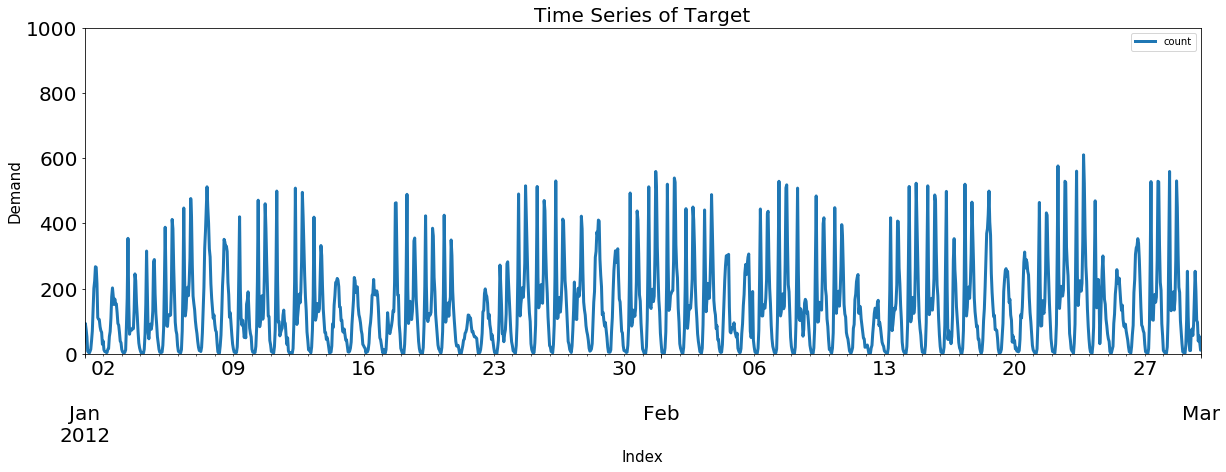

In [16]:
raw_all[['count']].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                              xlim=('2012-01-01', '2012-03-01'), ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

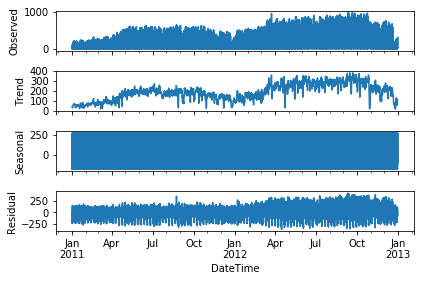

In [17]:
sm.tsa.seasonal_decompose(raw_all['count'], model='additive').plot()
plt.show()

In [18]:
# result = sm.tsa.seasonal_decompose(raw_all['count'], model='additive')
# pd.DataFrame(result.observed - result.trend - result.seasonal).describe()

In [19]:
# sm.tsa.seasonal_decompose(raw_all['count'], model='multiplicative').plot()
# plt.show()

In [20]:
result = sm.tsa.seasonal_decompose(raw_all['count'], model='additive')
Y_trend = pd.DataFrame(result.trend)
Y_trend.fillna(method='ffill', inplace=True)
Y_trend.fillna(method='bfill', inplace=True)
Y_trend.columns = ['count_trend']
Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method='ffill', inplace=True)
Y_seasonal.fillna(method='bfill', inplace=True)
Y_seasonal.columns = ['count_seasonal']
pd.concat([raw_all, Y_trend, Y_seasonal], axis=1).isnull().sum()
# pd.concat([raw_all, Y_seasonal], axis=1).isnull().sum()
if 'count_trend' not in raw_all.columns:
    if 'count_seasonal' not in raw_all.columns:
        raw_all = pd.concat([raw_all, Y_trend, Y_seasonal], axis=1)
raw_all

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 00:00:00 2011-01-01 00:00:00       1        0           0        1   
2011-01-01 01:00:00 2011-01-01 01:00:00       1        0           0        1   
2011-01-01 02:00:00 2011-01-01 02:00:00       1        0           0        1   
2011-01-01 03:00:00 2011-01-01 03:00:00       1        0           0        1   
2011-01-01 04:00:00 2011-01-01 04:00:00       1        0           0        1   
...                                 ...     ...      ...         ...      ...   
2012-12-31 19:00:00 2012-12-31 19:00:00       1        0           1        2   
2012-12-31 20:00:00 2012-12-31 20:00:00       1        0           1        2   
2012-12-31 21:00:00 2012-12-31 21:00:00       1        0           1        1   
2012-12-31 22:00:00 2012-12-31 22:00:00       1        0           1        1   
2012-12-31 23:00:00 2012-12-31 23:00:00       1        0           1        1   

                     temp  atemp  humidity  windspeed  casual  registered  \
DateTime                                                                    
2011-01-01 00:00:00  9.84  14.39        81       0.00       3          13   
2011-01-01 01:00:00  9.02  13.63        80       0.00       8          32   
2011-01-01 02:00:00  9.02  13.63        80       0.00       5          27   
2011-01-01 03:00:00  9.84  14.39        75       0.00       3          10   
2011-01-01 04:00:00  9.84  14.39        75       0.00       0           1   
...                   ...    ...       ...        ...     ...         ...   
2012-12-31 19:00:00 10.66  12.88        60      11.00      11         108   
2012-12-31 20:00:00 10.66  12.88        60      11.00       8          81   
2012-12-31 21:00:00 10.66  12.88        60      11.00       7          83   
2012-12-31 22:00:00 10.66  13.63        56       9.00      13          48   
2012-12-31 23:00:00 10.66  13.63        65       9.00      12          37   

                     count  count_trend  count_seasonal  
DateTime                                                 
2011-01-01 00:00:00     16        41.06         -134.25  
2011-01-01 01:00:00     40        41.06         -154.75  
2011-01-01 02:00:00     32        41.06         -165.27  
2011-01-01 03:00:00     13        41.06         -176.48  
2011-01-01 04:00:00      1        41.06         -181.67  
...                    ...          ...             ...  
2012-12-31 19:00:00    119       113.71          122.70  
2012-12-31 20:00:00     89       113.71           37.48  
2012-12-31 21:00:00     90       113.71          -16.10  
2012-12-31 22:00:00     61       113.71          -56.94  
2012-12-31 23:00:00     49       113.71         -100.31  

[17544 rows x 14 columns]

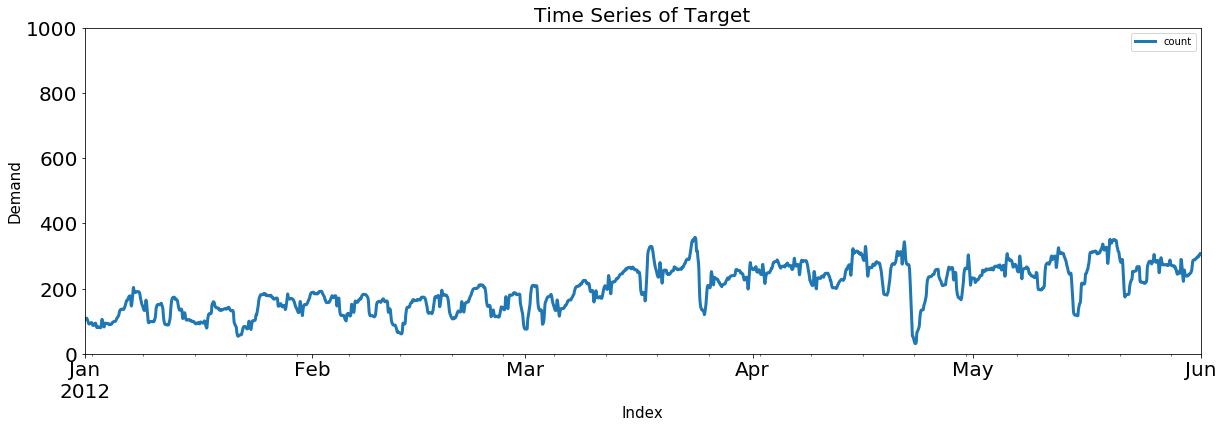

In [21]:
raw_all[['count']].rolling(24).mean().plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                             xlim=('2012-01-01', '2012-06-01'), ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

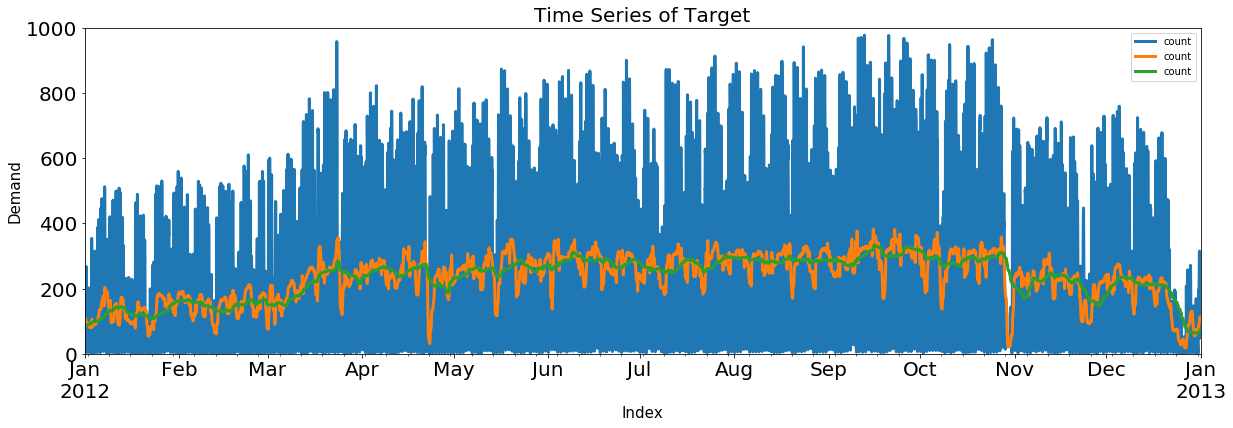

In [22]:
pd.concat([raw_all[['count']],
           raw_all[['count']].rolling(24).mean(),
           raw_all[['count']].rolling(24*7).mean()], axis=1).plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                                                  xlim=('2012-01-01', '2013-01-01'), ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()


In [23]:
# raw_all[['count']].rolling(24).mean()

In [24]:
Y_count_Day = raw_all[['count']].rolling(24).mean()
Y_count_Day.fillna(method='ffill', inplace=True)
Y_count_Day.fillna(method='bfill', inplace=True)
Y_count_Day.columns = ['count_Day']
Y_count_Week = raw_all[['count']].rolling(24*7).mean()
Y_count_Week.fillna(method='ffill', inplace=True)
Y_count_Week.fillna(method='bfill', inplace=True)
Y_count_Week.columns = ['count_Week']
if 'count_Day' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_count_Day], axis=1)
if 'count_Week' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_count_Week], axis=1)
raw_all

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 00:00:00 2011-01-01 00:00:00       1        0           0        1   
2011-01-01 01:00:00 2011-01-01 01:00:00       1        0           0        1   
2011-01-01 02:00:00 2011-01-01 02:00:00       1        0           0        1   
2011-01-01 03:00:00 2011-01-01 03:00:00       1        0           0        1   
2011-01-01 04:00:00 2011-01-01 04:00:00       1        0           0        1   
...                                 ...     ...      ...         ...      ...   
2012-12-31 19:00:00 2012-12-31 19:00:00       1        0           1        2   
2012-12-31 20:00:00 2012-12-31 20:00:00       1        0           1        2   
2012-12-31 21:00:00 2012-12-31 21:00:00       1        0           1        1   
2012-12-31 22:00:00 2012-12-31 22:00:00       1        0           1        1   
2012-12-31 23:00:00 2012-12-31 23:00:00       1        0           1        1   

                     temp  atemp  humidity  windspeed  casual  registered  \
DateTime                                                                    
2011-01-01 00:00:00  9.84  14.39        81       0.00       3          13   
2011-01-01 01:00:00  9.02  13.63        80       0.00       8          32   
2011-01-01 02:00:00  9.02  13.63        80       0.00       5          27   
2011-01-01 03:00:00  9.84  14.39        75       0.00       3          10   
2011-01-01 04:00:00  9.84  14.39        75       0.00       0           1   
...                   ...    ...       ...        ...     ...         ...   
2012-12-31 19:00:00 10.66  12.88        60      11.00      11         108   
2012-12-31 20:00:00 10.66  12.88        60      11.00       8          81   
2012-12-31 21:00:00 10.66  12.88        60      11.00       7          83   
2012-12-31 22:00:00 10.66  13.63        56       9.00      13          48   
2012-12-31 23:00:00 10.66  13.63        65       9.00      12          37   

                     count  count_trend  count_seasonal  count_Day  count_Week  
DateTime                                                                        
2011-01-01 00:00:00     16        41.06         -134.25      41.04       56.11  
2011-01-01 01:00:00     40        41.06         -154.75      41.04       56.11  
2011-01-01 02:00:00     32        41.06         -165.27      41.04       56.11  
2011-01-01 03:00:00     13        41.06         -176.48      41.04       56.11  
2011-01-01 04:00:00      1        41.06         -181.67      41.04       56.11  
...                    ...          ...             ...        ...         ...  
2012-12-31 19:00:00    119       113.71          122.70     110.17       73.30  
2012-12-31 20:00:00     89       113.71           37.48     110.88       73.70  
2012-12-31 21:00:00     90       113.71          -16.10     112.67       74.10  
2012-12-31 22:00:00     61       113.71          -56.94     113.71       74.39  
2012-12-31 23:00:00     49       113.71         -100.31     113.71       74.62  

[17544 rows x 16 columns]

In [25]:
raw_all[['count']].diff().plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                 xlim=('2012-01-01', '2012-06-01'), ylim=(-1000,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

In [26]:
Y_diff = raw_all[['count']].diff()
Y_diff.fillna(method='ffill', inplace=True)
Y_diff.fillna(method='bfill', inplace=True)
Y_diff.columns = ['count_diff']
if 'count_diff' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_diff], axis=1)
raw_all

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 00:00:00 2011-01-01 00:00:00       1        0           0        1   
2011-01-01 01:00:00 2011-01-01 01:00:00       1        0           0        1   
2011-01-01 02:00:00 2011-01-01 02:00:00       1        0           0        1   
2011-01-01 03:00:00 2011-01-01 03:00:00       1        0           0        1   
2011-01-01 04:00:00 2011-01-01 04:00:00       1        0           0        1   
...                                 ...     ...      ...         ...      ...   
2012-12-31 19:00:00 2012-12-31 19:00:00       1        0           1        2   
2012-12-31 20:00:00 2012-12-31 20:00:00       1        0           1        2   
2012-12-31 21:00:00 2012-12-31 21:00:00       1        0           1        1   
2012-12-31 22:00:00 2012-12-31 22:00:00       1        0           1        1   
2012-12-31 23:00:00 2012-12-31 23:00:00       1        0           1        1   

                     temp  atemp  humidity  windspeed  casual  registered  \
DateTime                                                                    
2011-01-01 00:00:00  9.84  14.39        81       0.00       3          13   
2011-01-01 01:00:00  9.02  13.63        80       0.00       8          32   
2011-01-01 02:00:00  9.02  13.63        80       0.00       5          27   
2011-01-01 03:00:00  9.84  14.39        75       0.00       3          10   
2011-01-01 04:00:00  9.84  14.39        75       0.00       0           1   
...                   ...    ...       ...        ...     ...         ...   
2012-12-31 19:00:00 10.66  12.88        60      11.00      11         108   
2012-12-31 20:00:00 10.66  12.88        60      11.00       8          81   
2012-12-31 21:00:00 10.66  12.88        60      11.00       7          83   
2012-12-31 22:00:00 10.66  13.63        56       9.00      13          48   
2012-12-31 23:00:00 10.66  13.63        65       9.00      12          37   

                     count  count_trend  count_seasonal  count_Day  \
DateTime                                                             
2011-01-01 00:00:00     16        41.06         -134.25      41.04   
2011-01-01 01:00:00     40        41.06         -154.75      41.04   
2011-01-01 02:00:00     32        41.06         -165.27      41.04   
2011-01-01 03:00:00     13        41.06         -176.48      41.04   
2011-01-01 04:00:00      1        41.06         -181.67      41.04   
...                    ...          ...             ...        ...   
2012-12-31 19:00:00    119       113.71          122.70     110.17   
2012-12-31 20:00:00     89       113.71           37.48     110.88   
2012-12-31 21:00:00     90       113.71          -16.10     112.67   
2012-12-31 22:00:00     61       113.71          -56.94     113.71   
2012-12-31 23:00:00     49       113.71         -100.31     113.71   

                     count_Week  count_diff  
DateTime                                     
2011-01-01 00:00:00       56.11       24.00  
2011-01-01 01:00:00       56.11       24.00  
2011-01-01 02:00:00       56.11       -8.00  
2011-01-01 03:00:00       56.11      -19.00  
2011-01-01 04:00:00       56.11      -12.00  
...                         ...         ...  
2012-12-31 19:00:00       73.30       -3.00  
2012-12-31 20:00:00       73.70      -30.00  
2012-12-31 21:00:00       74.10        1.00  
2012-12-31 22:00:00       74.39      -29.00  
2012-12-31 23:00:00       74.62      -12.00  

[17544 rows x 17 columns]

In [27]:
# raw_all[['temp']].ndim

In [28]:
raw_all['temp_group'] = pd.cut(raw_all['temp'], 10)
raw_all

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 00:00:00 2011-01-01 00:00:00       1        0           0        1   
2011-01-01 01:00:00 2011-01-01 01:00:00       1        0           0        1   
2011-01-01 02:00:00 2011-01-01 02:00:00       1        0           0        1   
2011-01-01 03:00:00 2011-01-01 03:00:00       1        0           0        1   
2011-01-01 04:00:00 2011-01-01 04:00:00       1        0           0        1   
...                                 ...     ...      ...         ...      ...   
2012-12-31 19:00:00 2012-12-31 19:00:00       1        0           1        2   
2012-12-31 20:00:00 2012-12-31 20:00:00       1        0           1        2   
2012-12-31 21:00:00 2012-12-31 21:00:00       1        0           1        1   
2012-12-31 22:00:00 2012-12-31 22:00:00       1        0           1        1   
2012-12-31 23:00:00 2012-12-31 23:00:00       1        0           1        1   

                     temp  atemp  humidity  windspeed  casual  registered  \
DateTime                                                                    
2011-01-01 00:00:00  9.84  14.39        81       0.00       3          13   
2011-01-01 01:00:00  9.02  13.63        80       0.00       8          32   
2011-01-01 02:00:00  9.02  13.63        80       0.00       5          27   
2011-01-01 03:00:00  9.84  14.39        75       0.00       3          10   
2011-01-01 04:00:00  9.84  14.39        75       0.00       0           1   
...                   ...    ...       ...        ...     ...         ...   
2012-12-31 19:00:00 10.66  12.88        60      11.00      11         108   
2012-12-31 20:00:00 10.66  12.88        60      11.00       8          81   
2012-12-31 21:00:00 10.66  12.88        60      11.00       7          83   
2012-12-31 22:00:00 10.66  13.63        56       9.00      13          48   
2012-12-31 23:00:00 10.66  13.63        65       9.00      12          37   

                     count  count_trend  count_seasonal  count_Day  \
DateTime                                                             
2011-01-01 00:00:00     16        41.06         -134.25      41.04   
2011-01-01 01:00:00     40        41.06         -154.75      41.04   
2011-01-01 02:00:00     32        41.06         -165.27      41.04   
2011-01-01 03:00:00     13        41.06         -176.48      41.04   
2011-01-01 04:00:00      1        41.06         -181.67      41.04   
...                    ...          ...             ...        ...   
2012-12-31 19:00:00    119       113.71          122.70     110.17   
2012-12-31 20:00:00     89       113.71           37.48     110.88   
2012-12-31 21:00:00     90       113.71          -16.10     112.67   
2012-12-31 22:00:00     61       113.71          -56.94     113.71   
2012-12-31 23:00:00     49       113.71         -100.31     113.71   

                     count_Week  count_diff       temp_group  
DateTime                                                      
2011-01-01 00:00:00       56.11       24.00  (8.856, 12.874]  
2011-01-01 01:00:00       56.11       24.00  (8.856, 12.874]  
2011-01-01 02:00:00       56.11       -8.00  (8.856, 12.874]  
2011-01-01 03:00:00       56.11      -19.00  (8.856, 12.874]  
2011-01-01 04:00:00       56.11      -12.00  (8.856, 12.874]  
...                         ...         ...              ...  
2012-12-31 19:00:00       73.30       -3.00  (8.856, 12.874]  
2012-12-31 20:00:00       73.70      -30.00  (8.856, 12.874]  
2012-12-31 21:00:00       74.10        1.00  (8.856, 12.874]  
2012-12-31 22:00:00       74.39      -29.00  (8.856, 12.874]  
2012-12-31 23:00:00       74.62      -12.00  (8.856, 12.874]  

[17544 rows x 18 columns]

In [29]:
# raw_all.describe().T
# raw_all.describe(include='all').T

In [30]:
# raw_all.isnull()
# raw_all.isnull().sum()

In [31]:
# pd.options.display.max_rows = 100
# raw_all.dtypes
# pd.options.display.max_rows = 10

In [32]:
# raw_all.datetime.dt
# raw_all.datetime.dt.year

In [33]:
raw_all['Year'] = raw_all.datetime.dt.year
raw_all['Quater'] = raw_all.datetime.dt.quarter
raw_all['Quater_ver2'] = raw_all['Quater'] + (raw_all.Year - raw_all.Year.min()) * 4
raw_all

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 00:00:00 2011-01-01 00:00:00       1        0           0        1   
2011-01-01 01:00:00 2011-01-01 01:00:00       1        0           0        1   
2011-01-01 02:00:00 2011-01-01 02:00:00       1        0           0        1   
2011-01-01 03:00:00 2011-01-01 03:00:00       1        0           0        1   
2011-01-01 04:00:00 2011-01-01 04:00:00       1        0           0        1   
...                                 ...     ...      ...         ...      ...   
2012-12-31 19:00:00 2012-12-31 19:00:00       1        0           1        2   
2012-12-31 20:00:00 2012-12-31 20:00:00       1        0           1        2   
2012-12-31 21:00:00 2012-12-31 21:00:00       1        0           1        1   
2012-12-31 22:00:00 2012-12-31 22:00:00       1        0           1        1   
2012-12-31 23:00:00 2012-12-31 23:00:00       1        0           1        1   

                     temp  atemp  humidity  windspeed  casual     ...       \
DateTime                                                          ...        
2011-01-01 00:00:00  9.84  14.39        81       0.00       3     ...        
2011-01-01 01:00:00  9.02  13.63        80       0.00       8     ...        
2011-01-01 02:00:00  9.02  13.63        80       0.00       5     ...        
2011-01-01 03:00:00  9.84  14.39        75       0.00       3     ...        
2011-01-01 04:00:00  9.84  14.39        75       0.00       0     ...        
...                   ...    ...       ...        ...     ...     ...        
2012-12-31 19:00:00 10.66  12.88        60      11.00      11     ...        
2012-12-31 20:00:00 10.66  12.88        60      11.00       8     ...        
2012-12-31 21:00:00 10.66  12.88        60      11.00       7     ...        
2012-12-31 22:00:00 10.66  13.63        56       9.00      13     ...        
2012-12-31 23:00:00 10.66  13.63        65       9.00      12     ...        

                     count  count_trend  count_seasonal  count_Day  \
DateTime                                                             
2011-01-01 00:00:00     16        41.06         -134.25      41.04   
2011-01-01 01:00:00     40        41.06         -154.75      41.04   
2011-01-01 02:00:00     32        41.06         -165.27      41.04   
2011-01-01 03:00:00     13        41.06         -176.48      41.04   
2011-01-01 04:00:00      1        41.06         -181.67      41.04   
...                    ...          ...             ...        ...   
2012-12-31 19:00:00    119       113.71          122.70     110.17   
2012-12-31 20:00:00     89       113.71           37.48     110.88   
2012-12-31 21:00:00     90       113.71          -16.10     112.67   
2012-12-31 22:00:00     61       113.71          -56.94     113.71   
2012-12-31 23:00:00     49       113.71         -100.31     113.71   

                     count_Week  count_diff       temp_group  Year  Quater  \
DateTime                                                                     
2011-01-01 00:00:00       56.11       24.00  (8.856, 12.874]  2011       1   
2011-01-01 01:00:00       56.11       24.00  (8.856, 12.874]  2011       1   
2011-01-01 02:00:00       56.11       -8.00  (8.856, 12.874]  2011       1   
2011-01-01 03:00:00       56.11      -19.00  (8.856, 12.874]  2011       1   
2011-01-01 04:00:00       56.11      -12.00  (8.856, 12.874]  2011       1   
...                         ...         ...              ...   ...     ...   
2012-12-31 19:00:00       73.30       -3.00  (8.856, 12.874]  2012       4   
2012-12-31 20:00:00       73.70      -30.00  (8.856, 12.874]  2012       4   
2012-12-31 21:00:00       74.10        1.00  (8.856, 12.874]  2012       4   
2012-12-31 22:00:00       74.39      -29.00  (8.856, 12.874]  2012       4   
2012-12-31 23:00:00       74.62      -12.00  (8.856, 12.874]  2012       4   

                     Quater_ver2  
D

In [34]:
raw_all['Month'] = raw_all.datetime.dt.month
raw_all['Day'] = raw_all.datetime.dt.day
raw_all['Hour'] = raw_all.datetime.dt.hour
raw_all['DayofWeek'] = raw_all.datetime.dt.dayofweek
raw_all

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 00:00:00 2011-01-01 00:00:00       1        0           0        1   
2011-01-01 01:00:00 2011-01-01 01:00:00       1        0           0        1   
2011-01-01 02:00:00 2011-01-01 02:00:00       1        0           0        1   
2011-01-01 03:00:00 2011-01-01 03:00:00       1        0           0        1   
2011-01-01 04:00:00 2011-01-01 04:00:00       1        0           0        1   
...                                 ...     ...      ...         ...      ...   
2012-12-31 19:00:00 2012-12-31 19:00:00       1        0           1        2   
2012-12-31 20:00:00 2012-12-31 20:00:00       1        0           1        2   
2012-12-31 21:00:00 2012-12-31 21:00:00       1        0           1        1   
2012-12-31 22:00:00 2012-12-31 22:00:00       1        0           1        1   
2012-12-31 23:00:00 2012-12-31 23:00:00       1        0           1        1   

                     temp  atemp  humidity  windspeed  casual    ...      \
DateTime                                                         ...       
2011-01-01 00:00:00  9.84  14.39        81       0.00       3    ...       
2011-01-01 01:00:00  9.02  13.63        80       0.00       8    ...       
2011-01-01 02:00:00  9.02  13.63        80       0.00       5    ...       
2011-01-01 03:00:00  9.84  14.39        75       0.00       3    ...       
2011-01-01 04:00:00  9.84  14.39        75       0.00       0    ...       
...                   ...    ...       ...        ...     ...    ...       
2012-12-31 19:00:00 10.66  12.88        60      11.00      11    ...       
2012-12-31 20:00:00 10.66  12.88        60      11.00       8    ...       
2012-12-31 21:00:00 10.66  12.88        60      11.00       7    ...       
2012-12-31 22:00:00 10.66  13.63        56       9.00      13    ...       
2012-12-31 23:00:00 10.66  13.63        65       9.00      12    ...       

                     count_Week  count_diff       temp_group  Year  Quater  \
DateTime                                                                     
2011-01-01 00:00:00       56.11       24.00  (8.856, 12.874]  2011       1   
2011-01-01 01:00:00       56.11       24.00  (8.856, 12.874]  2011       1   
2011-01-01 02:00:00       56.11       -8.00  (8.856, 12.874]  2011       1   
2011-01-01 03:00:00       56.11      -19.00  (8.856, 12.874]  2011       1   
2011-01-01 04:00:00       56.11      -12.00  (8.856, 12.874]  2011       1   
...                         ...         ...              ...   ...     ...   
2012-12-31 19:00:00       73.30       -3.00  (8.856, 12.874]  2012       4   
2012-12-31 20:00:00       73.70      -30.00  (8.856, 12.874]  2012       4   
2012-12-31 21:00:00       74.10        1.00  (8.856, 12.874]  2012       4   
2012-12-31 22:00:00       74.39      -29.00  (8.856, 12.874]  2012       4   
2012-12-31 23:00:00       74.62      -12.00  (8.856, 12.874]  2012       4   

                     Quater_ver2  Month Day  Hour  DayofWeek  
DateTime                                                      
2011-01-01 00:00:00            1      1   1     0          5  
2011-01-01 01:00:00            1      1   1     1          5  
2011-01-01 02:00:00            1      1   1     2          5  
2011-01-01 03:00:00            1      1   1     3          5  
2011-01-01 04:00:00            1      1   1     4          5  
...                          ...    ...  ..   ...        ...  
2012-12-31 19:00:00            8     12  31    19          0  
2012-12-31 20:00:00            8     12  31    20          0  
2012-12-31 21:00:00            8     12  31    21          0  
2012-12-31 22:00:00            8     12  31    22          0  
2012-12-31 23:00:00            8     12  31    23          0  

[17544 rows x 25 columns]

In [35]:
# raw_all.info()
# raw_all.describe(include='all').T

In [36]:
# raw_all['count'].shift(1)
# raw_all['count'].shift(-1)

In [37]:
raw_all['count_lag1'] = raw_all['count'].shift(1)
raw_all['count_lag2'] = raw_all['count'].shift(2)

In [38]:
# raw_all.describe().T
# raw_all

In [39]:
# raw_all['count_lag2'].fillna(method='bfill')
# raw_all['count_lag2'].fillna(method='ffill')
# raw_all['count_lag2'].fillna(0)

In [40]:
raw_all['count_lag1'].fillna(method='bfill', inplace=True)
raw_all['count_lag2'].fillna(method='bfill', inplace=True)
raw_all

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 00:00:00 2011-01-01 00:00:00       1        0           0        1   
2011-01-01 01:00:00 2011-01-01 01:00:00       1        0           0        1   
2011-01-01 02:00:00 2011-01-01 02:00:00       1        0           0        1   
2011-01-01 03:00:00 2011-01-01 03:00:00       1        0           0        1   
2011-01-01 04:00:00 2011-01-01 04:00:00       1        0           0        1   
...                                 ...     ...      ...         ...      ...   
2012-12-31 19:00:00 2012-12-31 19:00:00       1        0           1        2   
2012-12-31 20:00:00 2012-12-31 20:00:00       1        0           1        2   
2012-12-31 21:00:00 2012-12-31 21:00:00       1        0           1        1   
2012-12-31 22:00:00 2012-12-31 22:00:00       1        0           1        1   
2012-12-31 23:00:00 2012-12-31 23:00:00       1        0           1        1   

                     temp  atemp  humidity  windspeed  casual     ...      \
DateTime                                                          ...       
2011-01-01 00:00:00  9.84  14.39        81       0.00       3     ...       
2011-01-01 01:00:00  9.02  13.63        80       0.00       8     ...       
2011-01-01 02:00:00  9.02  13.63        80       0.00       5     ...       
2011-01-01 03:00:00  9.84  14.39        75       0.00       3     ...       
2011-01-01 04:00:00  9.84  14.39        75       0.00       0     ...       
...                   ...    ...       ...        ...     ...     ...       
2012-12-31 19:00:00 10.66  12.88        60      11.00      11     ...       
2012-12-31 20:00:00 10.66  12.88        60      11.00       8     ...       
2012-12-31 21:00:00 10.66  12.88        60      11.00       7     ...       
2012-12-31 22:00:00 10.66  13.63        56       9.00      13     ...       
2012-12-31 23:00:00 10.66  13.63        65       9.00      12     ...       

                          temp_group  Year  Quater  Quater_ver2  Month  Day  \
DateTime                                                                      
2011-01-01 00:00:00  (8.856, 12.874]  2011       1            1      1    1   
2011-01-01 01:00:00  (8.856, 12.874]  2011       1            1      1    1   
2011-01-01 02:00:00  (8.856, 12.874]  2011       1            1      1    1   
2011-01-01 03:00:00  (8.856, 12.874]  2011       1            1      1    1   
2011-01-01 04:00:00  (8.856, 12.874]  2011       1            1      1    1   
...                              ...   ...     ...          ...    ...  ...   
2012-12-31 19:00:00  (8.856, 12.874]  2012       4            8     12   31   
2012-12-31 20:00:00  (8.856, 12.874]  2012       4            8     12   31   
2012-12-31 21:00:00  (8.856, 12.874]  2012       4            8     12   31   
2012-12-31 22:00:00  (8.856, 12.874]  2012       4            8     12   31   
2012-12-31 23:00:00  (8.856, 12.874]  2012       4            8     12   31   

                     Hour DayofWeek  count_lag1  count_lag2  
DateTime                                                     
2011-01-01 00:00:00     0         5       16.00       16.00  
2011-01-01 01:00:00     1         5       16.00       16.00  
2011-01-01 02:00:00     2         5       40.00       16.00  
2011-01-01 03:00:00     3         5       32.00       40.00  
2011-01-01 04:00:00     4         5       13.00       32.00  
...                   ...       ...         ...         ...  
2012-12-31 19:00:00    19         0      122.00      164.00  
2012-12-31 20:00:00    20         0      119.00      122.00  
2012-12-31 21:00:00    21         0       89.00      119.00  
2012-12-31 22:00:00    22         0       90.00       89.00  
2012-12-31 23:00:00    23         0       61.00       90.00  

[17544 rows x 27 columns]

In [41]:
# pd.get_dummies(raw_all['Quater'])
# pd.get_dummies(raw_all['Quater']).describe().T
# pd.get_dummies(raw_all['Quater'], prefix='Quater_Dummy')
# pd.get_dummies(raw_all['Quater'], prefix='Quater_Dummy', drop_first=True)
# pd.concat([raw_all, pd.get_dummies(raw_all['Quater'], prefix='Quater_Dummy', drop_first=True)
# ], axis=1)

In [42]:
if 'Quater' in raw_all.columns:
    raw_all = pd.concat([raw_all, pd.get_dummies(raw_all['Quater'], prefix='Quater_Dummy', drop_first=True)
], axis=1)
    del raw_all['Quater']
raw_all.describe(include='all').T

count unique                  top freq  \
datetime           17544  17379  2012-10-29 00:00:00   37   
season         17,544.00    NaN                  NaN  NaN   
holiday        17,544.00    NaN                  NaN  NaN   
workingday     17,544.00    NaN                  NaN  NaN   
weather        17,544.00    NaN                  NaN  NaN   
...                  ...    ...                  ...  ...   
count_lag1     17,544.00    NaN                  NaN  NaN   
count_lag2     17,544.00    NaN                  NaN  NaN   
Quater_Dummy_2 17,544.00    NaN                  NaN  NaN   
Quater_Dummy_3 17,544.00    NaN                  NaN  NaN   
Quater_Dummy_4 17,544.00    NaN                  NaN  NaN   

                              first                 last   mean    std  min  \
datetime        2011-01-01 00:00:00  2012-12-31 23:00:00    NaN    NaN  NaN   
season                          NaN                  NaN   2.50   1.11 1.00   
holiday                         NaN                  NaN   0.03   0.17 0.00   
workingday                      NaN                  NaN   0.68   0.47 0.00   
weather                         NaN                  NaN   1.43   0.65 1.00   
...                             ...                  ...    ...    ...  ...   
count_lag1                      NaN                  NaN 187.79 181.35 1.00   
count_lag2                      NaN                  NaN 187.79 181.35 1.00   
Quater_Dummy_2                  NaN                  NaN   0.25   0.43 0.00   
Quater_Dummy_3                  NaN                  NaN   0.25   0.43 0.00   
Quater_Dummy_4                  NaN                  NaN   0.25   0.43 0.00   

                 25%    50%    75%    max  
datetime         NaN    NaN    NaN    NaN  
season          2.00   3.00   3.00   4.00  
holiday         0.00   0.00   0.00   1.00  
workingday      0.00   1.00   1.00   1.00  
weather         1.00   1.00   2.00   4.00  
...              ...    ...    ...    ...  
count_lag1     38.00 140.00 279.00 977.00  
count_lag2     38.00 140.00 279.00 977.00  
Quater_Dummy_2  0.00   0.00   0.00   1.00  
Quater_Dummy_3  0.00   0.00   1.00   1.00  
Quater_Dummy_4  0.00   0.00   1.00   1.00  

[29 rows x 13 columns]

In [6]:
### Functinalize
### Feature engineering of default
def non_feature_engineering(raw):
    if 'datetime' in raw.columns:
        raw['datetime'] = pd.to_datetime(raw['datetime'])
        raw['DateTime'] = pd.to_datetime(raw['datetime'])
    if raw.index.dtype == 'int64':
        raw.set_index('DateTime', inplace=True)
    # bring back
    # if raw.index.dtype != 'int64':
    #     raw.reset_index(drop=False, inplace=True)
    raw = raw.asfreq('H', method='ffill')
    raw_nfe = raw.copy()
    return raw_nfe
# raw_all = non_feature_engineering(raw_all)


### Feature engineering of all
def feature_engineering(raw):
    if 'datetime' in raw.columns:
        raw['datetime'] = pd.to_datetime(raw['datetime'])
        raw['DateTime'] = pd.to_datetime(raw['datetime'])

    if raw.index.dtype == 'int64':
        raw.set_index('DateTime', inplace=True)

    raw = raw.asfreq('H', method='ffill')

    result = sm.tsa.seasonal_decompose(raw['count'], model='additive')
    Y_trend = pd.DataFrame(result.trend)
    Y_trend.fillna(method='ffill', inplace=True)
    Y_trend.fillna(method='bfill', inplace=True)
    Y_trend.columns = ['count_trend']
    Y_seasonal = pd.DataFrame(result.seasonal)
    Y_seasonal.fillna(method='ffill', inplace=True)
    Y_seasonal.fillna(method='bfill', inplace=True)
    Y_seasonal.columns = ['count_seasonal']
    pd.concat([raw, Y_trend, Y_seasonal], axis=1).isnull().sum()
    if 'count_trend' not in raw.columns:
        if 'count_seasonal' not in raw.columns:
            raw = pd.concat([raw, Y_trend, Y_seasonal], axis=1)

    Y_count_Day = raw[['count']].rolling(24).mean()
    Y_count_Day.fillna(method='ffill', inplace=True)
    Y_count_Day.fillna(method='bfill', inplace=True)
    Y_count_Day.columns = ['count_Day']
    Y_count_Week = raw[['count']].rolling(24*7).mean()
    Y_count_Week.fillna(method='ffill', inplace=True)
    Y_count_Week.fillna(method='bfill', inplace=True)
    Y_count_Week.columns = ['count_Week']
    if 'count_Day' not in raw.columns:
        raw = pd.concat([raw, Y_count_Day], axis=1)
    if 'count_Week' not in raw.columns:
        raw = pd.concat([raw, Y_count_Week], axis=1)

    Y_diff = raw[['count']].diff()
    Y_diff.fillna(method='ffill', inplace=True)
    Y_diff.fillna(method='bfill', inplace=True)
    Y_diff.columns = ['count_diff']
    if 'count_diff' not in raw.columns:
        raw = pd.concat([raw, Y_diff], axis=1)

    raw['temp_group'] = pd.cut(raw['temp'], 10)
    raw['Year'] = raw.datetime.dt.year
    raw['Quater'] = raw.datetime.dt.quarter
    raw['Quater_ver2'] = raw['Quater'] + (raw.Year - raw.Year.min()) * 4
    raw['Month'] = raw.datetime.dt.month
    raw['Day'] = raw.datetime.dt.day
    raw['Hour'] = raw.datetime.dt.hour
    raw['DayofWeek'] = raw.datetime.dt.dayofweek

    raw['count_lag1'] = raw['count'].shift(1)
    raw['count_lag2'] = raw['count'].shift(2)
    raw['count_lag1'].fillna(method='bfill', inplace=True)
    raw['count_lag2'].fillna(method='bfill', inplace=True)

    if 'Quater' in raw.columns:
        raw = pd.concat([raw, pd.get_dummies(raw['Quater'], prefix='Quater_Dummy', drop_first=True)
    ], axis=1)
        del raw['Quater']
    raw_fe = raw.copy()
    return raw_fe
# raw_all = feature_engineering(raw_all)

# Data Understanding
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  

In [44]:
# raw_all.describe(include='all').T

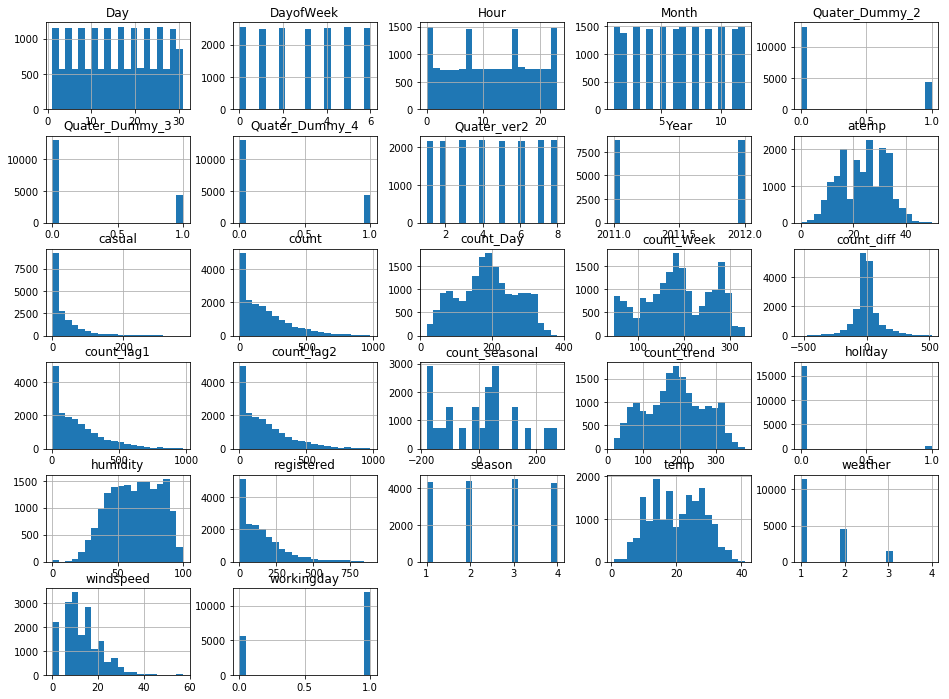

In [45]:
raw_all.hist(bins=20, grid=True, figsize=(16,12))
plt.show()

(0, 1000)

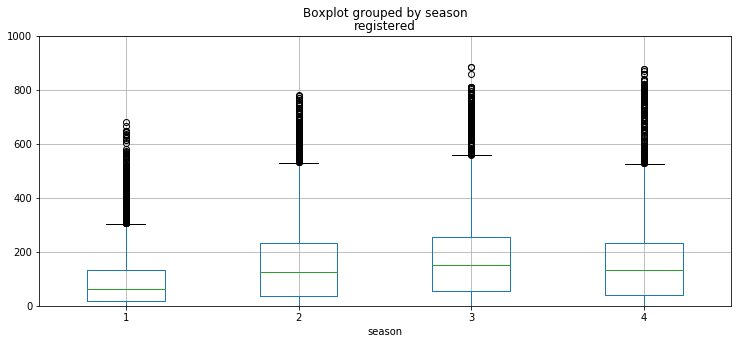

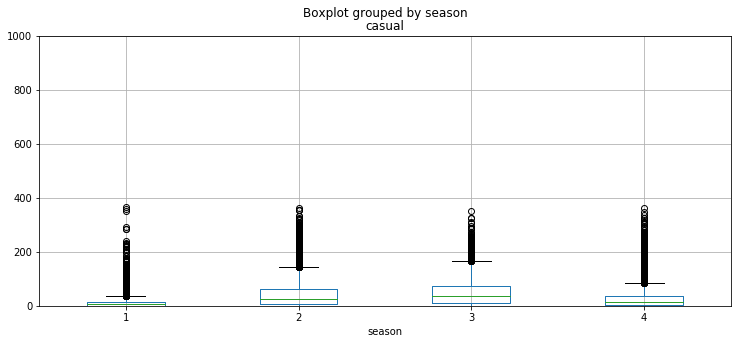

In [46]:
raw_all.boxplot(column='count', by='season', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_all.boxplot(column='registered', by='season', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_all.boxplot(column='casual', by='season', grid=True, figsize=(12,5))
plt.ylim(0,1000)

(0, 1000)

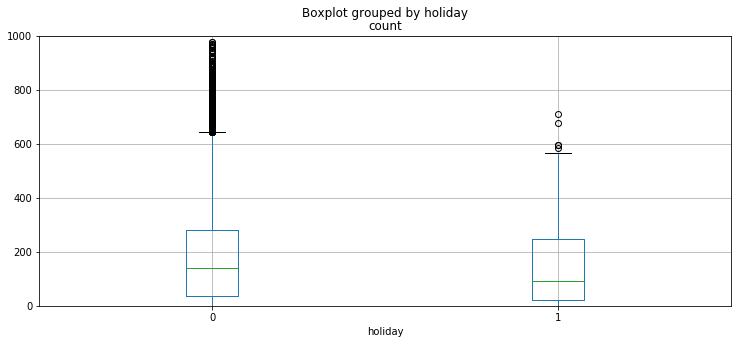

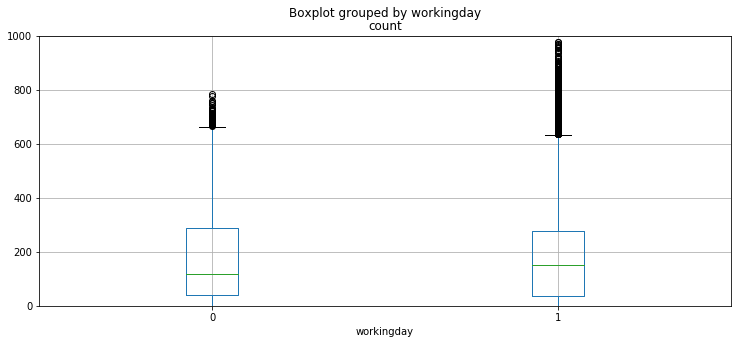

In [47]:
raw_all.boxplot(column='count', by='holiday', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_all.boxplot(column='count', by='workingday', grid=True, figsize=(12,5))
plt.ylim(0,1000)

In [48]:
# raw_all[raw_all.holiday == 0]

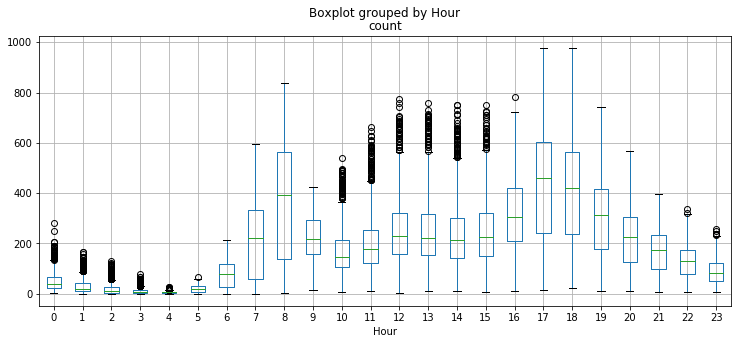

In [49]:
raw_all[raw_all.holiday == 0].boxplot(column='count', by='Hour', grid=True, figsize=(12,5))
plt.show()
raw_all[raw_all.holiday == 1].boxplot(column='count', by='Hour', grid=True, figsize=(12,5))
plt.show()

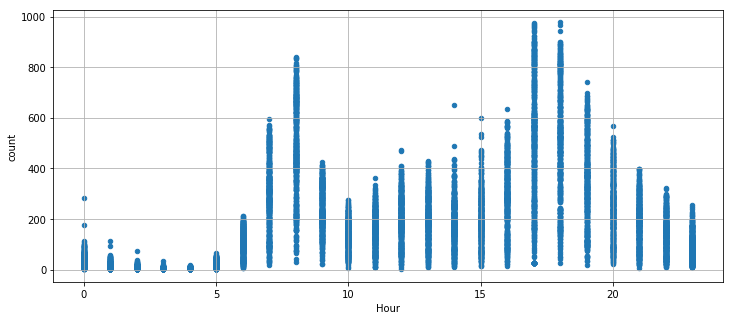

In [50]:
raw_all[raw_all.workingday == 0].plot.scatter(y='count', x='Hour', grid=True, figsize=(12,5))
plt.show()
raw_all[raw_all.workingday == 1].plot.scatter(y='count', x='Hour', grid=True, figsize=(12,5))
plt.show()

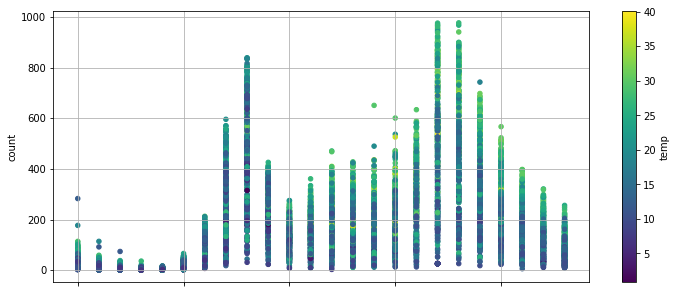

In [51]:
raw_all[raw_all.workingday == 0].plot.scatter(y='count', x='Hour', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()
raw_all[raw_all.workingday == 1].plot.scatter(y='count', x='Hour', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()

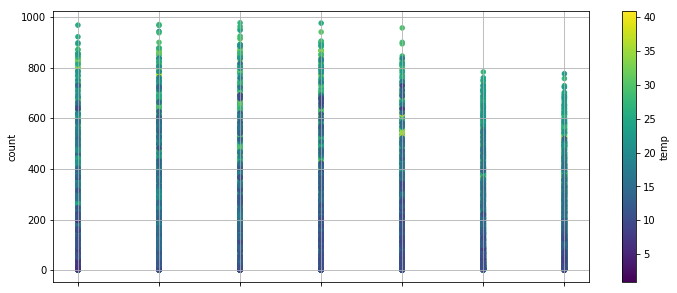

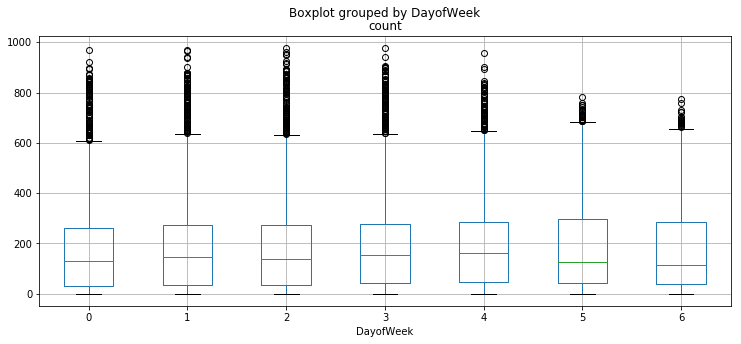

In [52]:
raw_all.plot.scatter(y='count', x='DayofWeek', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()
raw_all.boxplot(column='count', by='DayofWeek', grid=True, figsize=(12,5))
plt.show()

(0, 1000)

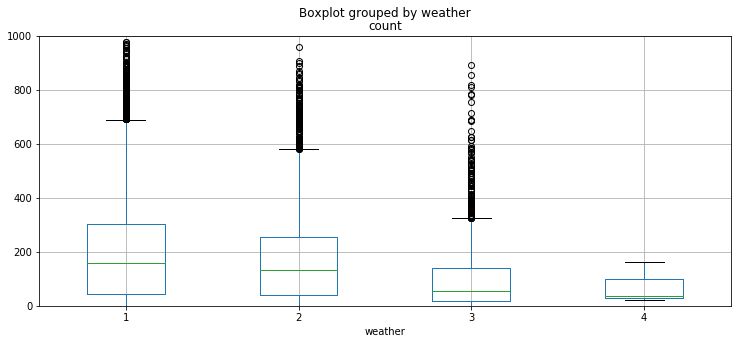

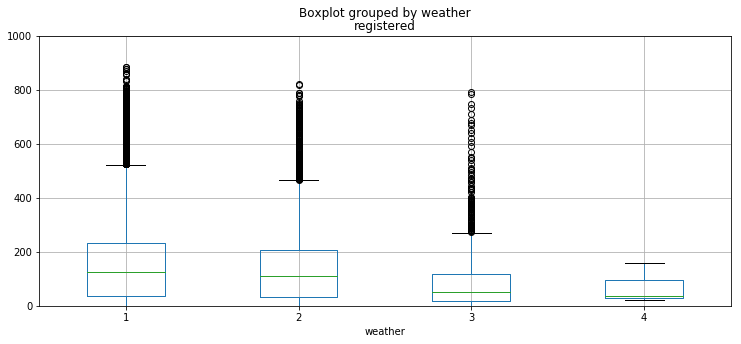

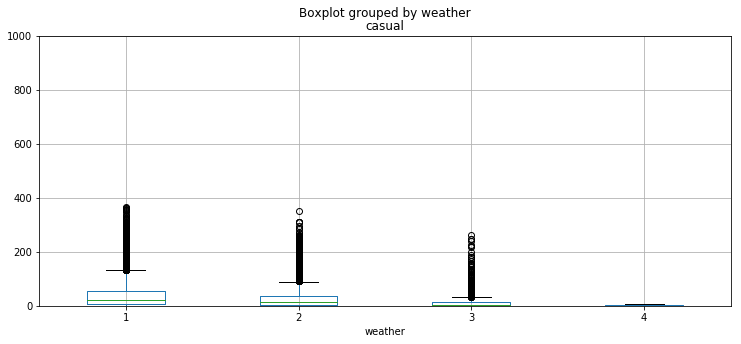

In [53]:
raw_all.boxplot(column='count', by='weather', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_all.boxplot(column='registered', by='weather', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_all.boxplot(column='casual', by='weather', grid=True, figsize=(12,5))
plt.ylim(0,1000)

In [54]:
# pd.concat([raw_all.dtypes, raw_all.describe(include='all').T], axis=1)

In [55]:
# raw_all['weather'].value_counts()

In [56]:
pd.DataFrame(raw_all['weather'].value_counts()/raw_all['weather'].value_counts().sum()*100).T

1     2    3    4
weather 65.29 26.01 8.68 0.02

In [57]:
# pd.crosstab(index=raw_all['count'], columns=raw_all['weather'], margins=True)

In [58]:
sub_table = pd.crosstab(index=raw_all['count'], columns=raw_all['weather'], margins=True)
sub_table/sub_table.loc['All']*100

weather      1      2      3      4    All
count                                     
1         0.87   0.99   1.77   0.00   0.98
2         1.19   1.29   2.43   0.00   1.32
3         1.19   1.45   2.69   0.00   1.39
4         1.30   1.36   2.36   0.00   1.41
5         1.43   1.38   2.36   0.00   1.50
...        ...    ...    ...    ...    ...
968       0.01   0.00   0.00   0.00   0.01
970       0.01   0.00   0.00   0.00   0.01
976       0.01   0.00   0.00   0.00   0.01
977       0.01   0.00   0.00   0.00   0.01
All     100.00 100.00 100.00 100.00 100.00

[870 rows x 5 columns]

In [59]:
# raw_all.groupby('weather').describe().T

In [60]:
# raw_all.groupby(['weather', 'DayofWeek']).count()
# raw_all.groupby(['weather', 'DayofWeek']).mean()

In [61]:
raw_all.groupby(['weather', 'DayofWeek']).describe()

Day                                              Hour  \
                     count  mean  std   min   25%   50%   75%   max    count   
weather DayofWeek                                                              
1       0         1,594.00 15.64 8.96  1.00  8.00 15.00 24.00 31.00 1,594.00   
        1         1,527.00 16.16 9.11  1.00  8.00 16.00 24.50 31.00 1,527.00   
        2         1,577.00 15.86 8.83  1.00  8.00 16.00 24.00 31.00 1,577.00   
        3         1,660.00 15.01 8.97  1.00  7.00 14.00 23.00 31.00 1,660.00   
        4         1,649.00 15.41 8.70  1.00  8.00 15.00 23.00 31.00 1,649.00   
...                    ...   ...  ...   ...   ...   ...   ...   ...      ...   
3       5           201.00 16.32 9.61  1.00  8.00 16.00 25.00 31.00   201.00   
        6           170.00 14.36 9.42  1.00  6.00 14.00 22.00 30.00   170.00   
4       0             1.00  9.00  nan  9.00  9.00  9.00  9.00  9.00     1.00   
        2             1.00 26.00  nan 26.00 26.00 26.00 26.00 26.00     1.00   
        5             1.00 21.00  nan 21.00 21.00 21.00 21.00 21.00     1.00   

                        ...  windspeed       workingday                      \
                   mean ...        75%   max      count mean  std  min  25%   
weather DayofWeek       ...                                                   
1       0         11.39 ...      19.00 48.00   1,594.00 0.86 0.35 0.00 1.00   
        1         12.17 ...      19.00 52.00   1,527.00 1.00 0.06 0.00 1.00   
        2         11.60 ...      17.00 39.00   1,577.00 0.99 0.12 0.00 1.00   
        3         11.90 ...      19.00 46.00   1,660.00 0.97 0.17 0.00 1.00   
        4         11.57 ...      17.00 54.00   1,649.00 0.97 0.16 0.00 1.00   
...                 ... ...        ...   ...        ...  ...  ...  ...  ...   
3       5         12.18 ...      24.00 56.00     201.00 0.00 0.00 0.00 0.00   
        6         13.77 ...      22.00 57.00     170.00 0.00 0.00 0.00 0.00   
4       0         18.00 ...       6.00  6.00       1.00 1.00  nan 1.00 1.00   
        2         16.00 ...      22.00 22.00       1.00 1.00  nan 1.00 1.00   
        5          1.00 ...      13.00 13.00       1.00 0.00  nan 0.00 0.00   

                                  
                   50%  75%  max  
weather DayofWeek                 
1       0         1.00 1.00 1.00  
        1         1.00 1.00 1.00  
        2         1.00 1.00 1.00  
        3         1.00 1.00 1.00  
        4         1.00 1.00 1.00  
...                ...  ...  ...  
3       5         0.00 0.00 0.00  
        6         0.00 0.00 0.00  
4       0         1.00 1.00 1.00  
        2         1.00 1.00 1.00  
        5         0.00 0.00 0.00  

[24 rows x 200 columns]

In [62]:
# raw_all.groupby(['weather', 'DayofWeek']).agg({'count':'mean'})
# raw_all.groupby(['weather', 'DayofWeek']).agg({'count':[sum, min, max]})

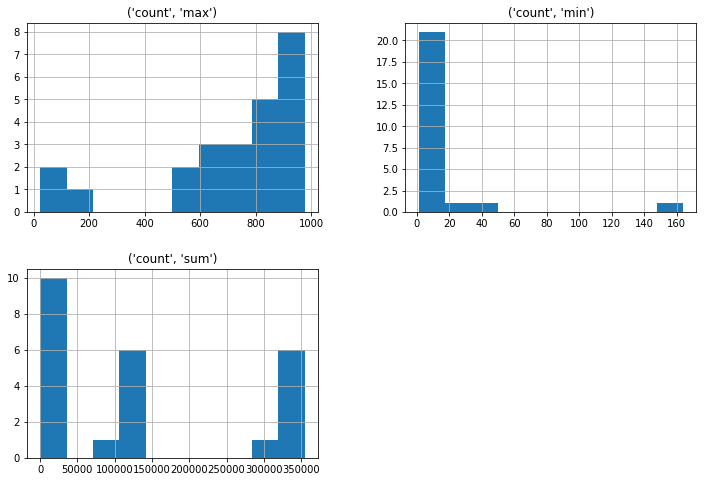

In [63]:
raw_all.groupby(['weather', 'DayofWeek']).agg({'count':[sum, min, max]}).hist(grid=True, figsize=(12,8))
plt.show()

In [64]:
# raw_all.groupby('weather').groups.keys()
# raw_all.groupby('weather').groups.items()

In [65]:
for key, item in raw_all.groupby('weather'):
    display(key, item)
    display(raw_all.groupby('weather').get_group(key).head())

1

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 00:00:00 2011-01-01 00:00:00       1        0           0        1   
2011-01-01 01:00:00 2011-01-01 01:00:00       1        0           0        1   
2011-01-01 02:00:00 2011-01-01 02:00:00       1        0           0        1   
2011-01-01 03:00:00 2011-01-01 03:00:00       1        0           0        1   
2011-01-01 04:00:00 2011-01-01 04:00:00       1        0           0        1   
...                                 ...     ...      ...         ...      ...   
2012-12-31 07:00:00 2012-12-31 07:00:00       1        0           1        1   
2012-12-31 08:00:00 2012-12-31 08:00:00       1        0           1        1   
2012-12-31 21:00:00 2012-12-31 21:00:00       1        0           1        1   
2012-12-31 22:00:00 2012-12-31 22:00:00       1        0           1        1   
2012-12-31 23:00:00 2012-12-31 23:00:00       1        0           1        1   

                     temp  atemp  humidity  windspeed  casual       ...        \
DateTime                                                            ...         
2011-01-01 00:00:00  9.84  14.39        81       0.00       3       ...         
2011-01-01 01:00:00  9.02  13.63        80       0.00       8       ...         
2011-01-01 02:00:00  9.02  13.63        80       0.00       5       ...         
2011-01-01 03:00:00  9.84  14.39        75       0.00       3       ...         
2011-01-01 04:00:00  9.84  14.39        75       0.00       0       ...         
...                   ...    ...       ...        ...     ...       ...         
2012-12-31 07:00:00  6.56   9.09        64       9.00       2       ...         
2012-12-31 08:00:00  5.74   7.58        69       9.00       9       ...         
2012-12-31 21:00:00 10.66  12.88        60      11.00       7       ...         
2012-12-31 22:00:00 10.66  13.63        56       9.00      13       ...         
2012-12-31 23:00:00 10.66  13.63        65       9.00      12       ...         

                     Quater_ver2  Month  Day  Hour  DayofWeek  count_lag1  \
DateTime                                                                    
2011-01-01 00:00:00            1      1    1     0          5       16.00   
2011-01-01 01:00:00            1      1    1     1          5       16.00   
2011-01-01 02:00:00            1      1    1     2          5       40.00   
2011-01-01 03:00:00            1      1    1     3          5       32.00   
2011-01-01 04:00:00            1      1    1     4          5       13.00   
...                          ...    ...  ...   ...        ...         ...   
2012-12-31 07:00:00            8     12   31     7          0       40.00   
2012-12-31 08:00:00            8     12   31     8          0       85.00   
2012-12-31 21:00:00            8     12   31    21          0       89.00   
2012-12-31 22:00:00            8     12   31    22          0       90.00   
2012-12-31 23:00:00            8     12   31    23          0       61.00   

                     count_lag2 Quater_Dummy_2  Quater_Dummy_3  Quater_Dummy_4  
DateTime                                                                        
2011-01-01 00:00:00       16.00              0               0               0  
2011-01-01 01:00:00       16.00              0               0               0  
2011-01-01 02:00:00       16.00              0               0               0  
2011-01-01 03:00:00       40.00              0               0               0  
2011-01-01 04:00:00       32.00              0               0               0  
...                         ...            ...             ...             ...  
2012-12-31 07:00:00        9.00              0               0               1  
2012-12-31 08:00:00       40.00              0               0               1  
2012-12-31 21:00:00      119.00              0               0               1  
2012-12-31 22:00:00       89.0

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 00:00:00 2011-01-01 00:00:00       1        0           0        1   
2011-01-01 01:00:00 2011-01-01 01:00:00       1        0           0        1   
2011-01-01 02:00:00 2011-01-01 02:00:00       1        0           0        1   
2011-01-01 03:00:00 2011-01-01 03:00:00       1        0           0        1   
2011-01-01 04:00:00 2011-01-01 04:00:00       1        0           0        1   

                     temp  atemp  humidity  windspeed  casual       ...        \
DateTime                                                            ...         
2011-01-01 00:00:00  9.84  14.39        81       0.00       3       ...         
2011-01-01 01:00:00  9.02  13.63        80       0.00       8       ...         
2011-01-01 02:00:00  9.02  13.63        80       0.00       5       ...         
2011-01-01 03:00:00  9.84  14.39        75       0.00       3       ...         
2011-01-01 04:00:00  9.84  14.39        75       0.00       0       ...         

                     Quater_ver2  Month  Day  Hour  DayofWeek  count_lag1  \
DateTime                                                                    
2011-01-01 00:00:00            1      1    1     0          5       16.00   
2011-01-01 01:00:00            1      1    1     1          5       16.00   
2011-01-01 02:00:00            1      1    1     2          5       40.00   
2011-01-01 03:00:00            1      1    1     3          5       32.00   
2011-01-01 04:00:00            1      1    1     4          5       13.00   

                     count_lag2 Quater_Dummy_2  Quater_Dummy_3  Quater_Dummy_4  
DateTime                                                                        
2011-01-01 00:00:00       16.00              0               0               0  
2011-01-01 01:00:00       16.00              0               0               0  
2011-01-01 02:00:00       16.00              0               0               0  
2011-01-01 03:00:00       40.00              0               0               0  
2011-01-01 04:00:00       32.00              0               0               0  

[5 rows x 29 columns]

2

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 05:00:00 2011-01-01 05:00:00       1        0           0        2   
2011-01-01 13:00:00 2011-01-01 13:00:00       1        0           0        2   
2011-01-01 14:00:00 2011-01-01 14:00:00       1        0           0        2   
2011-01-01 15:00:00 2011-01-01 15:00:00       1        0           0        2   
2011-01-01 16:00:00 2011-01-01 16:00:00       1        0           0        2   
...                                 ...     ...      ...         ...      ...   
2012-12-31 16:00:00 2012-12-31 16:00:00       1        0           1        2   
2012-12-31 17:00:00 2012-12-31 17:00:00       1        0           1        2   
2012-12-31 18:00:00 2012-12-31 18:00:00       1        0           1        2   
2012-12-31 19:00:00 2012-12-31 19:00:00       1        0           1        2   
2012-12-31 20:00:00 2012-12-31 20:00:00       1        0           1        2   

                     temp  atemp  humidity  windspeed  casual       ...        \
DateTime                                                            ...         
2011-01-01 05:00:00  9.84  12.88        75       6.00       0       ...         
2011-01-01 13:00:00 18.86  22.73        72      20.00      47       ...         
2011-01-01 14:00:00 18.86  22.73        72      19.00      35       ...         
2011-01-01 15:00:00 18.04  21.97        77      20.00      40       ...         
2011-01-01 16:00:00 17.22  21.21        82      20.00      41       ...         
...                   ...    ...       ...        ...     ...       ...         
2012-12-31 16:00:00 10.66  12.88        48      13.00      30       ...         
2012-12-31 17:00:00 10.66  14.39        48       6.00      14       ...         
2012-12-31 18:00:00 10.66  13.63        48       9.00      10       ...         
2012-12-31 19:00:00 10.66  12.88        60      11.00      11       ...         
2012-12-31 20:00:00 10.66  12.88        60      11.00       8       ...         

                     Quater_ver2  Month  Day  Hour  DayofWeek  count_lag1  \
DateTime                                                                    
2011-01-01 05:00:00            1      1    1     5          5        1.00   
2011-01-01 13:00:00            1      1    1    13          5       84.00   
2011-01-01 14:00:00            1      1    1    14          5       94.00   
2011-01-01 15:00:00            1      1    1    15          5      106.00   
2011-01-01 16:00:00            1      1    1    16          5      110.00   
...                          ...    ...  ...   ...        ...         ...   
2012-12-31 16:00:00            8     12   31    16          0      315.00   
2012-12-31 17:00:00            8     12   31    17          0      214.00   
2012-12-31 18:00:00            8     12   31    18          0      164.00   
2012-12-31 19:00:00            8     12   31    19          0      122.00   
2012-12-31 20:00:00            8     12   31    20          0      119.00   

                     count_lag2 Quater_Dummy_2  Quater_Dummy_3  Quater_Dummy_4  
DateTime                                                                        
2011-01-01 05:00:00       13.00              0               0               0  
2011-01-01 13:00:00       56.00              0               0               0  
2011-01-01 14:00:00       84.00              0               0               0  
2011-01-01 15:00:00       94.00              0               0               0  
2011-01-01 16:00:00      106.00              0               0               0  
...                         ...            ...             ...             ...  
2012-12-31 16:00:00      247.00              0               0               1  
2012-12-31 17:00:00      315.00              0               0               1  
2012-12-31 18:00:00      214.00              0               0               1  
2012-12-31 19:00:00      164.0

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 05:00:00 2011-01-01 05:00:00       1        0           0        2   
2011-01-01 13:00:00 2011-01-01 13:00:00       1        0           0        2   
2011-01-01 14:00:00 2011-01-01 14:00:00       1        0           0        2   
2011-01-01 15:00:00 2011-01-01 15:00:00       1        0           0        2   
2011-01-01 16:00:00 2011-01-01 16:00:00       1        0           0        2   

                     temp  atemp  humidity  windspeed  casual       ...        \
DateTime                                                            ...         
2011-01-01 05:00:00  9.84  12.88        75       6.00       0       ...         
2011-01-01 13:00:00 18.86  22.73        72      20.00      47       ...         
2011-01-01 14:00:00 18.86  22.73        72      19.00      35       ...         
2011-01-01 15:00:00 18.04  21.97        77      20.00      40       ...         
2011-01-01 16:00:00 17.22  21.21        82      20.00      41       ...         

                     Quater_ver2  Month  Day  Hour  DayofWeek  count_lag1  \
DateTime                                                                    
2011-01-01 05:00:00            1      1    1     5          5        1.00   
2011-01-01 13:00:00            1      1    1    13          5       84.00   
2011-01-01 14:00:00            1      1    1    14          5       94.00   
2011-01-01 15:00:00            1      1    1    15          5      106.00   
2011-01-01 16:00:00            1      1    1    16          5      110.00   

                     count_lag2 Quater_Dummy_2  Quater_Dummy_3  Quater_Dummy_4  
DateTime                                                                        
2011-01-01 05:00:00       13.00              0               0               0  
2011-01-01 13:00:00       56.00              0               0               0  
2011-01-01 14:00:00       84.00              0               0               0  
2011-01-01 15:00:00       94.00              0               0               0  
2011-01-01 16:00:00      106.00              0               0               0  

[5 rows x 29 columns]

3

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 18:00:00 2011-01-01 18:00:00       1        0           0        3   
2011-01-01 19:00:00 2011-01-01 19:00:00       1        0           0        3   
2011-01-02 06:00:00 2011-01-02 06:00:00       1        0           0        3   
2011-01-02 08:00:00 2011-01-02 08:00:00       1        0           0        3   
2011-01-02 14:00:00 2011-01-02 14:00:00       1        0           0        3   
...                                 ...     ...      ...         ...      ...   
2012-12-27 01:00:00 2012-12-27 01:00:00       1        0           1        3   
2012-12-29 10:00:00 2012-12-29 10:00:00       1        0           0        3   
2012-12-29 11:00:00 2012-12-29 11:00:00       1        0           0        3   
2012-12-29 12:00:00 2012-12-29 12:00:00       1        0           0        3   
2012-12-29 13:00:00 2012-12-29 13:00:00       1        0           0        3   

                     temp  atemp  humidity  windspeed  casual       ...        \
DateTime                                                            ...         
2011-01-01 18:00:00 17.22  21.21        88      17.00       9       ...         
2011-01-01 19:00:00 17.22  21.21        88      17.00       6       ...         
2011-01-02 06:00:00 17.22  21.21        77      20.00       0       ...         
2011-01-02 08:00:00 16.40  20.45        71      15.00       0       ...         
2011-01-02 14:00:00 14.76  17.43        76      13.00       4       ...         
...                   ...    ...       ...        ...     ...       ...         
2012-12-27 01:00:00  9.84   9.85        93      30.00       0       ...         
2012-12-29 10:00:00 10.66  12.12        81       9.00       6       ...         
2012-12-29 11:00:00  8.20  12.12        93       6.00       7       ...         
2012-12-29 12:00:00  8.20  12.12       100       0.00       5       ...         
2012-12-29 13:00:00  8.20  12.12       100       0.00      13       ...         

                     Quater_ver2  Month  Day  Hour  DayofWeek  count_lag1  \
DateTime                                                                    
2011-01-01 18:00:00            1      1    1    18          5       67.00   
2011-01-01 19:00:00            1      1    1    19          5       35.00   
2011-01-02 06:00:00            1      1    2     6          6        3.00   
2011-01-02 08:00:00            1      1    2     8          6        1.00   
2011-01-02 14:00:00            1      1    2    14          6       75.00   
...                          ...    ...  ...   ...        ...         ...   
2012-12-27 01:00:00            8     12   27     1          3        3.00   
2012-12-29 10:00:00            8     12   29    10          5       49.00   
2012-12-29 11:00:00            8     12   29    11          5       41.00   
2012-12-29 12:00:00            8     12   29    12          5       45.00   
2012-12-29 13:00:00            8     12   29    13          5       48.00   

                     count_lag2 Quater_Dummy_2  Quater_Dummy_3  Quater_Dummy_4  
DateTime                                                                        
2011-01-01 18:00:00       93.00              0               0               0  
2011-01-01 19:00:00       67.00              0               0               0  
2011-01-02 06:00:00        3.00              0               0               0  
2011-01-02 08:00:00        2.00              0               0               0  
2011-01-02 14:00:00       93.00              0               0               0  
...                         ...            ...             ...             ...  
2012-12-27 01:00:00       10.00              0               0               1  
2012-12-29 10:00:00       44.00              0               0               1  
2012-12-29 11:00:00       49.00              0               0               1  
2012-12-29 12:00:00       41.0

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-01 18:00:00 2011-01-01 18:00:00       1        0           0        3   
2011-01-01 19:00:00 2011-01-01 19:00:00       1        0           0        3   
2011-01-02 06:00:00 2011-01-02 06:00:00       1        0           0        3   
2011-01-02 08:00:00 2011-01-02 08:00:00       1        0           0        3   
2011-01-02 14:00:00 2011-01-02 14:00:00       1        0           0        3   

                     temp  atemp  humidity  windspeed  casual       ...        \
DateTime                                                            ...         
2011-01-01 18:00:00 17.22  21.21        88      17.00       9       ...         
2011-01-01 19:00:00 17.22  21.21        88      17.00       6       ...         
2011-01-02 06:00:00 17.22  21.21        77      20.00       0       ...         
2011-01-02 08:00:00 16.40  20.45        71      15.00       0       ...         
2011-01-02 14:00:00 14.76  17.43        76      13.00       4       ...         

                     Quater_ver2  Month  Day  Hour  DayofWeek  count_lag1  \
DateTime                                                                    
2011-01-01 18:00:00            1      1    1    18          5       67.00   
2011-01-01 19:00:00            1      1    1    19          5       35.00   
2011-01-02 06:00:00            1      1    2     6          6        3.00   
2011-01-02 08:00:00            1      1    2     8          6        1.00   
2011-01-02 14:00:00            1      1    2    14          6       75.00   

                     count_lag2 Quater_Dummy_2  Quater_Dummy_3  Quater_Dummy_4  
DateTime                                                                        
2011-01-01 18:00:00       93.00              0               0               0  
2011-01-01 19:00:00       67.00              0               0               0  
2011-01-02 06:00:00        3.00              0               0               0  
2011-01-02 08:00:00        2.00              0               0               0  
2011-01-02 14:00:00       93.00              0               0               0  

[5 rows x 29 columns]

4

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-26 16:00:00 2011-01-26 16:00:00       1        0           1        4   
2012-01-09 18:00:00 2012-01-09 18:00:00       1        0           1        4   
2012-01-21 01:00:00 2012-01-21 01:00:00       1        0           0        4   

                     temp  atemp  humidity  windspeed  casual       ...        \
DateTime                                                            ...         
2011-01-26 16:00:00  9.02   9.85        93      22.00       1       ...         
2012-01-09 18:00:00  8.20  11.37        86       6.00       6       ...         
2012-01-21 01:00:00  5.74   6.82        86      13.00       1       ...         

                     Quater_ver2  Month  Day  Hour  DayofWeek  count_lag1  \
DateTime                                                                    
2011-01-26 16:00:00            1      1   26    16          2       43.00   
2012-01-09 18:00:00            5      1    9    18          0      152.00   
2012-01-21 01:00:00            5      1   21     1          5       24.00   

                     count_lag2 Quater_Dummy_2  Quater_Dummy_3  Quater_Dummy_4  
DateTime                                                                        
2011-01-26 16:00:00       36.00              0               0               0  
2012-01-09 18:00:00       49.00              0               0               0  
2012-01-21 01:00:00       38.00              0               0               0  

[3 rows x 29 columns]

datetime  season  holiday  workingday  weather  \
DateTime                                                                        
2011-01-26 16:00:00 2011-01-26 16:00:00       1        0           1        4   
2012-01-09 18:00:00 2012-01-09 18:00:00       1        0           1        4   
2012-01-21 01:00:00 2012-01-21 01:00:00       1        0           0        4   

                     temp  atemp  humidity  windspeed  casual       ...        \
DateTime                                                            ...         
2011-01-26 16:00:00  9.02   9.85        93      22.00       1       ...         
2012-01-09 18:00:00  8.20  11.37        86       6.00       6       ...         
2012-01-21 01:00:00  5.74   6.82        86      13.00       1       ...         

                     Quater_ver2  Month  Day  Hour  DayofWeek  count_lag1  \
DateTime                                                                    
2011-01-26 16:00:00            1      1   26    16          2       43.00   
2012-01-09 18:00:00            5      1    9    18          0      152.00   
2012-01-21 01:00:00            5      1   21     1          5       24.00   

                     count_lag2 Quater_Dummy_2  Quater_Dummy_3  Quater_Dummy_4  
DateTime                                                                        
2011-01-26 16:00:00       36.00              0               0               0  
2012-01-09 18:00:00       49.00              0               0               0  
2012-01-21 01:00:00       38.00              0               0               0  

[3 rows x 29 columns]

In [66]:
# pd.cut(raw_all['temp'], 10)
# pd.cut(raw_all['temp'], 10).value_counts()

In [67]:
raw_all.groupby(pd.cut(raw_all['temp'], 10)).describe().T

temp                  (0.78, 4.838]  (4.838, 8.856]  (8.856, 12.874]  \
season         count         124.00        1,018.00         2,466.00   
               mean            1.00            1.22             2.02   
               std             0.00            0.75             1.36   
               min             1.00            1.00             1.00   
               25%             1.00            1.00             1.00   
...                             ...             ...              ...   
Quater_Dummy_4 min             0.00            0.00             0.00   
               25%             0.00            0.00             0.00   
               50%             0.00            0.00             0.00   
               75%             0.00            0.00             1.00   
               max             0.00            1.00             1.00   

temp                  (12.874, 16.892]  (16.892, 20.91]  (20.91, 24.928]  \
season         count          2,926.00         2,474.00         2,687.00   
               mean               2.51             2.66             2.71   
               std                1.36             1.21             0.96   
               min                1.00             1.00             1.00   
               25%                1.00             2.00             2.00   
...                                ...              ...              ...   
Quater_Dummy_4 min                0.00             0.00             0.00   
               25%                0.00             0.00             0.00   
               50%                0.00             0.00             0.00   
               75%                1.00             1.00             0.00   
               max                1.00             1.00             1.00   

temp                  (24.928, 28.946]  (28.946, 32.964]  (32.964, 36.982]  \
season         count          3,164.00          1,976.00            625.00   
               mean               2.73              2.80              2.86   
               std                0.65              0.44              0.35   
               min                1.00              1.00              2.00   
               25%                2.00              3.00              3.00   
...                                ...               ...               ...   
Quater_Dummy_4 min                0.00              0.00              0.00   
               25%                0.00              0.00              0.00   
               50%                0.00              0.00              0.00   
               75%                0.00              0.00              0.00   
               max                1.00              1.00              0.00   

temp                  (36.982, 41.0]  
season         count           84.00  
               mean             2.90  
               std              0.30  
               min              2.00  
               25%              3.00  
...                              ...  
Quater_Dummy_4 min              0.00  
               25%              0.00  
               50%              0.00  
               75%              0.00  
               max              0.00  

[216 rows x 10 columns]

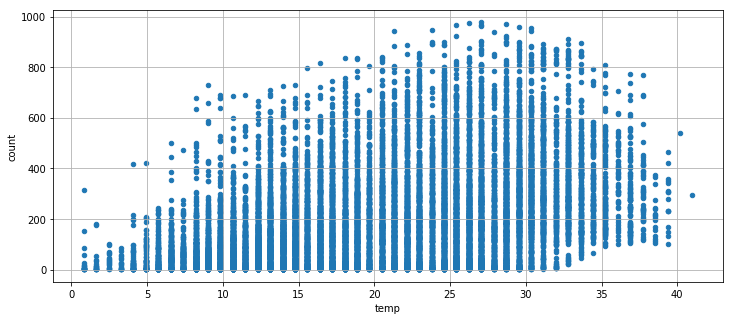

In [68]:
raw_all.plot.scatter(y='count', x='temp', grid=True, figsize=(12,5))
plt.show()

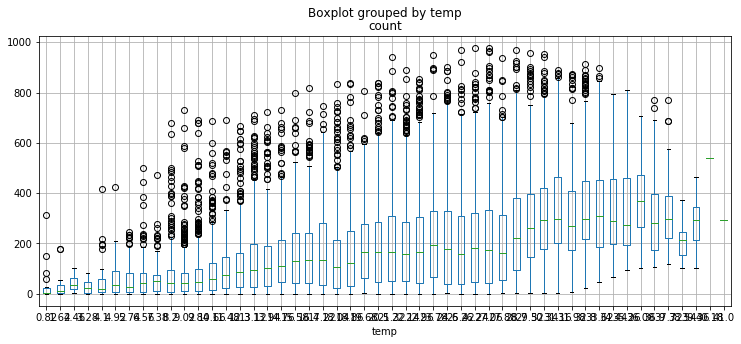

In [69]:
raw_all.boxplot(column='count', by='temp', grid=True, figsize=(12,5))
plt.show()

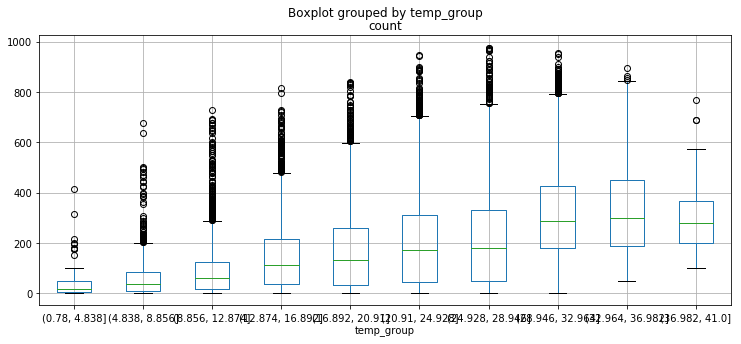

In [70]:
raw_all.boxplot(column='count', by='temp_group', grid=True, figsize=(12,5))
plt.show()

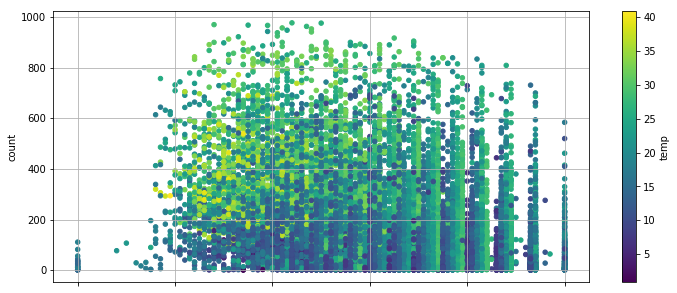

In [71]:
raw_all.plot.scatter(y='count', x='humidity', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()

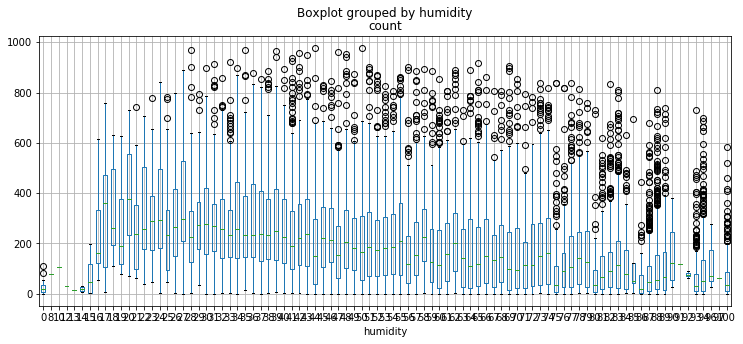

In [72]:
raw_all.boxplot(column='count', by='humidity', grid=True, figsize=(12,5))
plt.show()

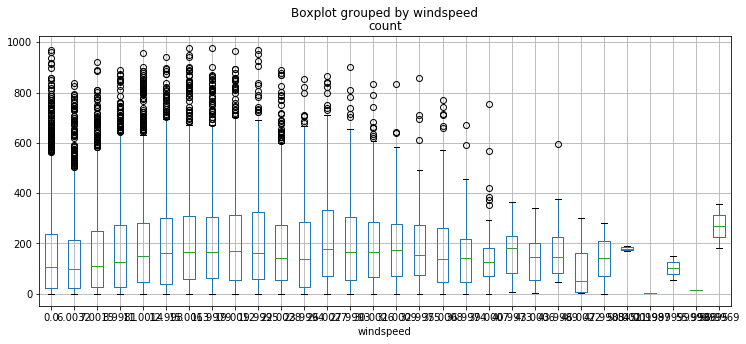

In [73]:
raw_all.boxplot(column='count', by='windspeed', grid=True, figsize=(12,5))
plt.show()

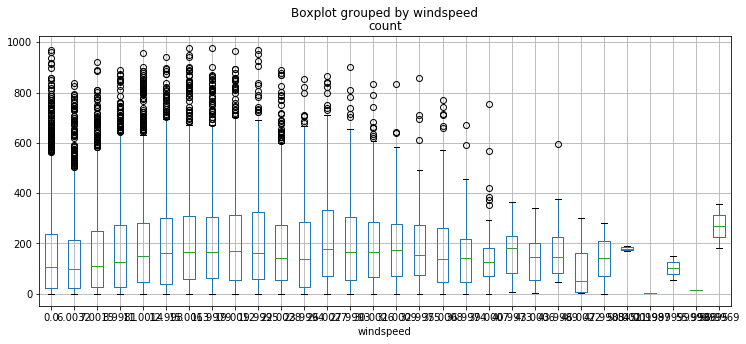

In [74]:
raw_all.boxplot(column='count', by='windspeed', grid=True, figsize=(12,5))
plt.show()

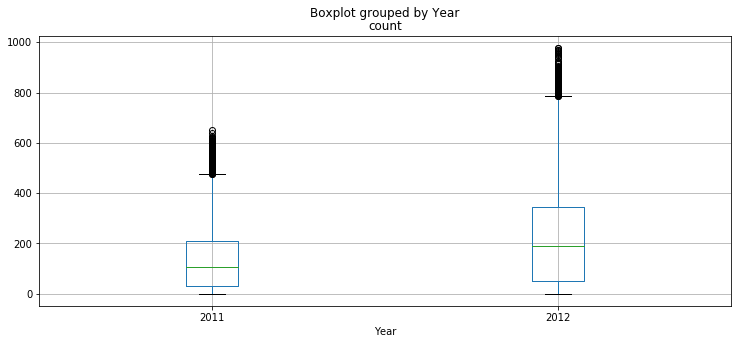

In [75]:
raw_all.boxplot(column='count', by='Year', grid=True, figsize=(12,5))
plt.show()

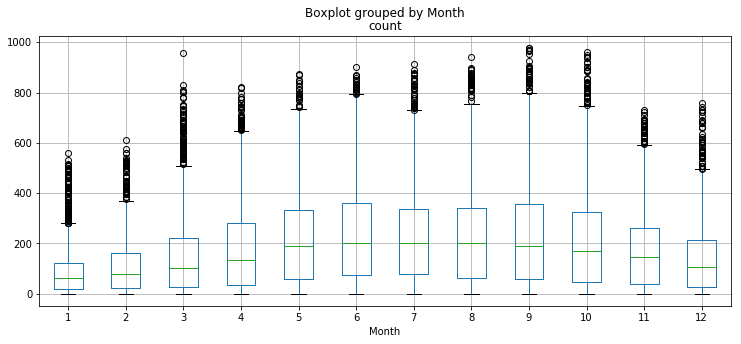

In [76]:
raw_all.boxplot(column='count', by='Month', grid=True, figsize=(12,5))
plt.show()

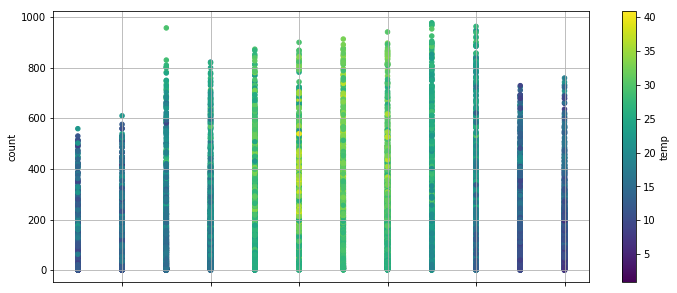

In [77]:
raw_all.plot.scatter(y='count', x='Month', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()

In [78]:
# pd.plotting.scatter_matrix(raw_all, figsize=(18,18), diagonal='kde')
# plt.show()

<img src='https://github.com/cheonbi/DataScience/blob/master/Image/Scatter_Matrix.png?raw=true' width='700'>

In [79]:
# raw_all.corr()
# raw_all.corr().style.background_gradient()
# raw_all.corr().style.background_gradient().set_precision(2)

In [80]:
raw_all.corr().style.background_gradient().set_precision(2).set_properties(**{'font-size': '15pt'})

In [81]:
raw_all.corr().iloc[:,8:11]

casual  registered  count
season            0.12        0.18   0.18
holiday           0.03       -0.05  -0.04
workingday       -0.30        0.13   0.03
weather          -0.16       -0.13  -0.15
temp              0.46        0.34   0.41
...                ...         ...    ...
count_lag1        0.65        0.80   0.85
count_lag2        0.58        0.53   0.60
Quater_Dummy_2    0.15        0.06   0.09
Quater_Dummy_3    0.17        0.13   0.15
Quater_Dummy_4   -0.10       -0.00  -0.03

[27 rows x 3 columns]

In [82]:
raw_all.corr().loc[:, ['casual', 'registered', 'count']]

casual  registered  count
season            0.12        0.18   0.18
holiday           0.03       -0.05  -0.04
workingday       -0.30        0.13   0.03
weather          -0.16       -0.13  -0.15
temp              0.46        0.34   0.41
...                ...         ...    ...
count_lag1        0.65        0.80   0.85
count_lag2        0.58        0.53   0.60
Quater_Dummy_2    0.15        0.06   0.09
Quater_Dummy_3    0.17        0.13   0.15
Quater_Dummy_4   -0.10       -0.00  -0.03

[27 rows x 3 columns]

In [83]:
raw_all.corr().loc[:, ['casual', 'registered', 'count']].style.background_gradient().set_precision(2).set_properties(**{'font-size': '15pt'})

In [84]:
raw_all.corr().iloc[0:8,8:11].style.background_gradient().set_precision(2).set_properties(**{'font-size': '15pt'})

# Data Split
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  
**5. Data Split: Train/Validate/Test Sets**  

In [85]:
# raw_all.isnull().sum().unique()

In [86]:
# for x in raw_all.columns:
#     if x not in Y_colname+X_remove:
#         print(x)

In [87]:
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_all.columns if x not in Y_colname+X_remove]
X_colname

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'count_trend',
 'count_seasonal',
 'count_Day',
 'count_Week',
 'count_diff',
 'Year',
 'Quater_ver2',
 'Month',
 'Day',
 'Hour',
 'DayofWeek',
 'count_lag1',
 'count_lag2',
 'Quater_Dummy_2',
 'Quater_Dummy_3',
 'Quater_Dummy_4']

In [88]:
# for a non time-series
# raw_train, raw_test = train_test_split(raw_all, test_size=0.2, random_state=123)
# print(raw_train.shape, raw_test.shape)
# raw_train
X_train, X_test, Y_train, Y_test = train_test_split(raw_all[X_colname], raw_all[Y_colname], test_size=0.2, random_state=123)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
X_train

(14035, 24) (14035, 1)
(3509, 24) (3509, 1)


season  holiday  workingday  weather  temp  atemp  \
DateTime                                                                 
2011-10-13 06:00:00       4        0           1        3 22.14  25.76   
2011-01-16 00:00:00       1        0           0        1 10.66  15.15   
2012-08-19 13:00:00       3        0           0        3 26.24  28.79   
2012-07-10 18:00:00       3        0           1        3 28.70  33.34   
2011-05-18 09:00:00       2        0           1        3 22.96  26.52   
...                     ...      ...         ...      ...   ...    ...   
2011-01-05 00:00:00       1        0           1        1  8.20  12.88   
2012-07-13 19:00:00       3        0           1        1 30.34  33.34   
2011-11-20 11:00:00       4        0           0        2 20.50  24.24   
2012-10-02 17:00:00       4        0           1        3 25.42  28.03   
2012-10-17 05:00:00       4        0           1        2 14.76  18.94   

                     humidity  windspeed  count_trend  count_seasonal  \
DateTime                                                                
2011-10-13 06:00:00       100       6.00       107.25         -112.33   
2011-01-16 00:00:00        56       0.00        54.31         -134.25   
2012-08-19 13:00:00        83       9.00       180.31           65.21   
2012-07-10 18:00:00        74      15.00       260.67          236.38   
2011-05-18 09:00:00        83      17.00       161.56           30.51   
...                       ...        ...          ...             ...   
2011-01-05 00:00:00        64       0.00        66.48         -134.25   
2012-07-13 19:00:00        51      11.00       311.67          122.70   
2011-11-20 11:00:00        63       7.00       148.02           19.32   
2012-10-02 17:00:00        88       7.00       194.73          273.37   
2012-10-17 05:00:00        81       0.00       308.65         -168.28   

                          ...        Quater_ver2  Month  Day  Hour  DayofWeek  \
DateTime                  ...                                                   
2011-10-13 06:00:00       ...                  4     10   13     6          3   
2011-01-16 00:00:00       ...                  1      1   16     0          6   
2012-08-19 13:00:00       ...                  7      8   19    13          6   
2012-07-10 18:00:00       ...                  7      7   10    18          1   
2011-05-18 09:00:00       ...                  2      5   18     9          2   
...                       ...                ...    ...  ...   ...        ...   
2011-01-05 00:00:00       ...                  1      1    5     0          2   
2012-07-13 19:00:00       ...                  7      7   13    19          4   
2011-11-20 11:00:00       ...                  4     11   20    11          6   
2012-10-02 17:00:00       ...                  8     10    2    17          1   
2012-10-17 05:00:00       ...                  8     10   17     5          2   

                     count_lag1  count_lag2  Quater_Dummy_2  Quater_Dummy_3  \
DateTime                                                                      
2011-10-13 06:00:00       17.00        7.00               0               0   
2011-01-16 00:00:00       44.00       26.00               0               0   
2012-08-19 13:00:00      298.00      272.00               0               1   
2012-07-10 18:00:00      872.00      435.00               0               1   
2011-05-18 09:00:00      453.00      274.00               1               0   
...                         ...         ...             ...             ...   
2011-01-05 00:00:00       11.00       35.00               0               0   
2012-07-13 19:00:00      631.00      835.00               0               1   
2011-11-20 11:00:00      229.00      138.00               0               0   
2012-10-02 17:00:00      374.00      209.00               0               0   
2012-10-17 05:00:00        4.00        7.00               0               0   

                     Quate

In [89]:
# for a time-series
raw_train = raw_all.loc[raw_all.index < '2012-07-01',:]
raw_test = raw_all.loc[raw_all.index >= '2012-07-01',:]
print(raw_train.shape, raw_test.shape)

(13128, 29) (4416, 29)


In [90]:
Y_train = raw_train[Y_colname]
X_train = raw_train[X_colname]
Y_test = raw_test[Y_colname]
X_test = raw_test[X_colname]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(13128, 24) (13128, 1)
(4416, 24) (4416, 1)


In [5]:
### Functionalize
### Data split of cross sectional
def datasplit_cs(raw, Y_colname, X_colname, test_size, random_seed=123):
    X_train, X_test, Y_train, Y_test = train_test_split(raw[X_colname], raw[Y_colname], test_size=test_size, random_state=random_seed)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)
    return X_train, X_test, Y_train, Y_test
# X_train, X_test, Y_train, Y_test = datasplit_cs(raw_all, Y_colname, X_colname, 0.2)


### Data split of time series
def datasplit_ts(raw, Y_colname, X_colname, criteria):
    raw_train = raw.loc[raw_all.index < criteria,:]
    raw_test = raw.loc[raw_all.index >= criteria,:]
    Y_train = raw_train[Y_colname]
    X_train = raw_train[X_colname]
    Y_test = raw_test[Y_colname]
    X_test = raw_test[X_colname]
    print('Train_size:', raw_train.shape, 'Test_size:', raw_test.shape)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)
    return X_train, X_test, Y_train, Y_test
# X_train, X_test, Y_train, Y_test = datasplit_ts(raw_all, Y_colname, X_colname, '2012-07-01')

# Applying Base Model
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  
**5. Data Split: Train/Validate/Test Sets**  
**6. Applying Base Model**  

In [92]:
# LinearRegression (using statsmodels)
model_fit_reg1 = sm.OLS(Y_train, X_train).fit()
model_fit_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.362e+08
Date:                Wed, 27 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:11:36   Log-Likelihood:                 1906.2
No. Observations:               13128   AIC:                            -3764.
Df Residuals:                   13104   BIC:                            -3585.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
season            -0.0005      0.004     -0.129      0.897      -0.009       0.008
holiday            0.0083      0.014      0.612      0.540      -0.018       0.035
workingday         0.0079      0.007      1.184      0.236      -0.005       0.021
weather            0.0042      0.003      1.232      0.218      -0.003       0.011
temp               0.0022      0.002      1.075      0.282      -0.002       0.006
atemp             -0.0025      0.002     -1.347      0.178      -0.006       0.001
humidity          -0.0001      0.000     -0.845      0.398      -0.000       0.000
windspeed          0.0003      0.000      1.062      0.288      -0.000       0.001
count_trend     9.161e-05   8.57e-05      1.069      0.285   -7.64e-05       0.000
count_seasonal  1.984e-05   2.56e-05      0.775      0.438   -3.03e-05       7e-05
count_Day       4.177e-05   8.36e-05      0.500      0.617      -0.000       0.000
count_Week     -4.345e-05   9.61e-05     -0.452      0.651      -0.000       0.000
count_diff         1.0000    2.9e-05   3.45e+04      0.000       1.000       1.000
Year           -1.547e-05   7.97e-06     -1.939      0.052   -3.11e-05    1.66e-07
Quater_ver2        0.0004      0.002      0.180      0.857      -0.004       0.005
Month              0.0026      0.002      1.051      0.293      -0.002       0.007
Day                0.0004      0.000      1.728      0.084   -4.91e-05       0.001
Hour               0.0006      0.000      1.538      0.124      -0.000       0.001
DayofWeek          0.0003      0.002      0.224      0.823      -0.003       0.003
count_lag1         1.0000    2.7e-05    3.7e+04      0.000       1.000       1.000
count_lag2     -1.926e-05   2.59e-05     -0.744      0.457      -7e-05    3.15e-05
Quater_Dummy_2    -0.0010      0.009     -0.115      0.909      -0.019       0.017
Quater_Dummy_3    -0.0037      0.017     -0.220      0.826      -0.037       0.030
Quater_Dummy_4    -0.0132      0.026     -0.512      0.609      -0.064       0.037
==============================================================================
Omnibus:                    54426.083   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      93552024983.782
Skew:                        -114.255   Prob(JB):                         0.00
Kurtosis:                   13078.751   Cond. No.                     3.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
# display(model_fit_reg1.predict(X_train))
# display(model_fit_reg1.predict(X_test))
model_pred_tr_reg1 = model_fit_reg1.predict(X_train).values
model_pred_te_reg1 = model_fit_reg1.predict(X_test).values

# Evaluation
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  
**5. Data Split: Train/Validate/Test Sets**  
**6. Applying Base Model**  
**7. Evaluation**  

In [94]:
# pd.concat([Y_train, pd.DataFrame(model_pred_tr_reg1, index=Y_train.index, columns=['prediction'])], axis=1)

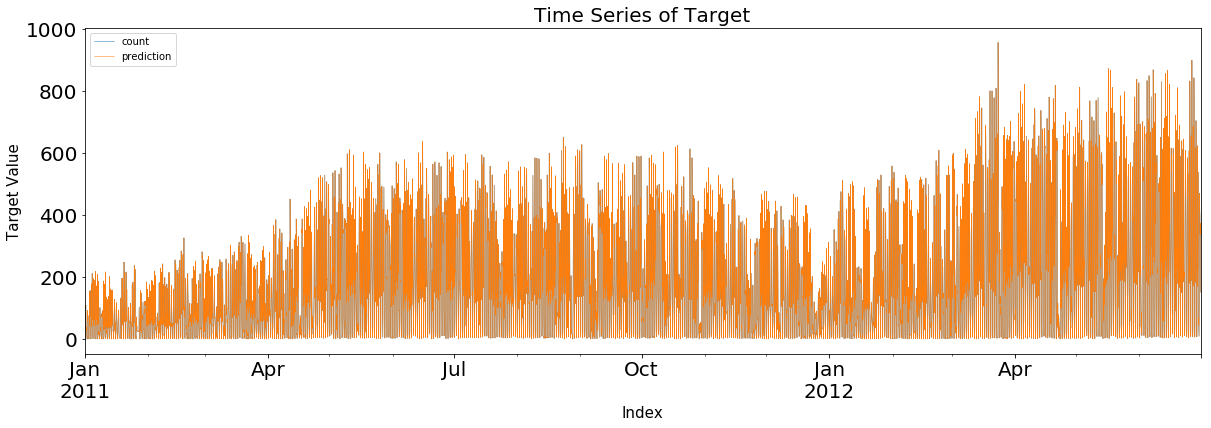

MAD  MSE  MAPE
Score 0.01 0.04  0.06

In [95]:
pd.concat([Y_train, pd.DataFrame(model_pred_tr_reg1, index=Y_train.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                               xlim=(Y_train.index.min(),Y_train.index.max()),
                                                                                                               linewidth=0.5, fontsize=20)
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Target Value', fontsize=15)
plt.show()

MAD = abs(Y_train.values.flatten() - model_pred_tr_reg1).mean()
MSE = ((Y_train.values.flatten() - model_pred_tr_reg1)**2).mean()
MAPE = (abs(Y_train.values.flatten() - model_pred_tr_reg1)/Y_train.values.flatten()*100).mean()

display(pd.DataFrame([MAD, MSE, MAPE], index=['MAD', 'MSE', 'MAPE'], columns=['Score']).T)

In [4]:
### Functionalize
### Evaluation of 1 pair of set
def evaluation(Y_real, Y_pred, graph_on=False):
    loss_length = len(Y_real.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[loss_length:]
    if graph_on == True:
        pd.concat([Y_real, pd.DataFrame(Y_pred, index=Y_real.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                           xlim=(Y_real.index.min(),Y_real.index.max()),
                                                                                                           linewidth=3, fontsize=20)
        plt.title('Time Series of Target', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)
    MAD = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAD, MSE, MAPE], index=['MAD', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    return Score, Residual
# Score_tr, Residual_tr = evaluation(Y_train, model_pred_tr_reg1, graph_on=True)


### Evaluation of train/test pairs
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te
# Score1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, model_pred_tr_reg1, Y_test, model_pred_te_reg1, graph_on=True)

# Error Analysis
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  
**5. Data Split: Train/Validate/Test Sets**  
**6. Applying Base Model**  
**7. Evaluation**  
**8. Error Analysis**  

In [134]:
# pd.Series(sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])
# sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])
# pd.Series(sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])[0:4], index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])

Stationarity  Normality  Autocorr(lag1)  \
Test Statistics                      -9.98       0.01            0.00   
p-value                               0.00       0.00            0.98   
Alternative                            nan        nan             nan   
Used Lag                             41.00        nan             nan   
Used Observations                13,086.00        nan             nan   
Critical Value(1%)                   -3.43        nan             nan   
Critical Value(5%)                   -2.86        nan             nan   
Critical Value(10%)                  -2.57        nan             nan   
Maximum Information Criteria   -106,845.57        nan             nan   

                              Autocorr(lag5)  Autocorr(lag10)  \
Test Statistics                         0.01             0.03   
p-value                                 1.00             1.00   
Alternative                              nan              nan   
Used Lag                                 nan              nan   
Used Observations                        nan              nan   
Critical Value(1%)                       nan              nan   
Critical Value(5%)                       nan              nan   
Critical Value(10%)                      nan              nan   
Maximum Information Criteria             nan              nan   

                              Autocorr(lag50) Heteroscedasticity  
Test Statistics                          0.10               0.00  
p-value                                  1.00               0.00  
Alternative                               nan          two-sided  
Used Lag                                  nan                NaN  
Used Observations                         nan                NaN  
Critical Value(1%)                        nan                NaN  
Critical Value(5%)                        nan                NaN  
Critical Value(10%)                       nan                NaN  
Maximum Information Criteria              nan                NaN

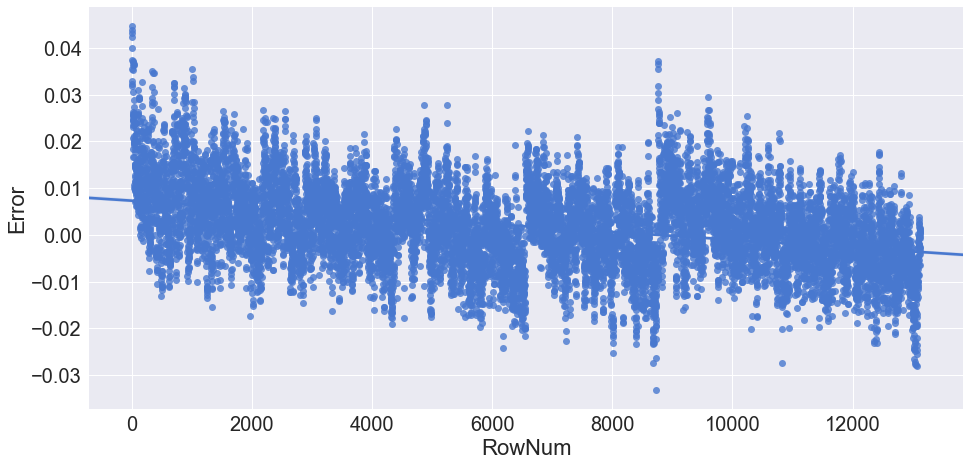

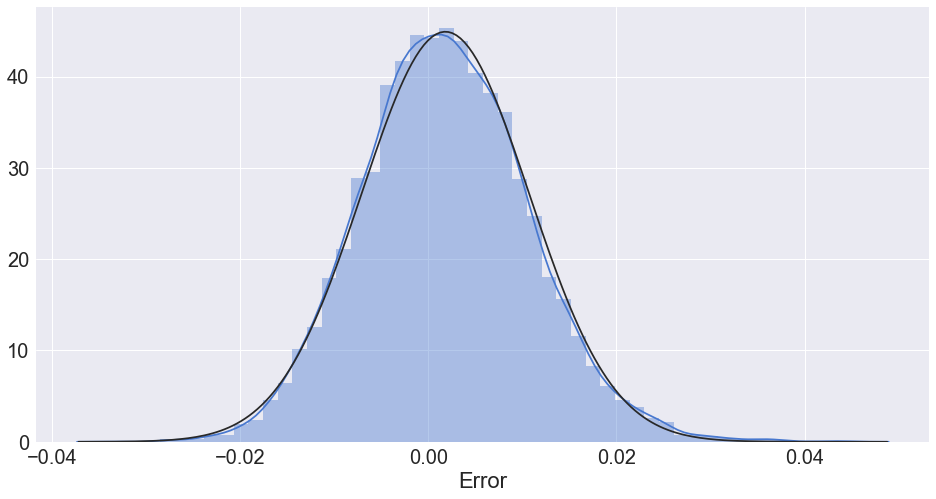

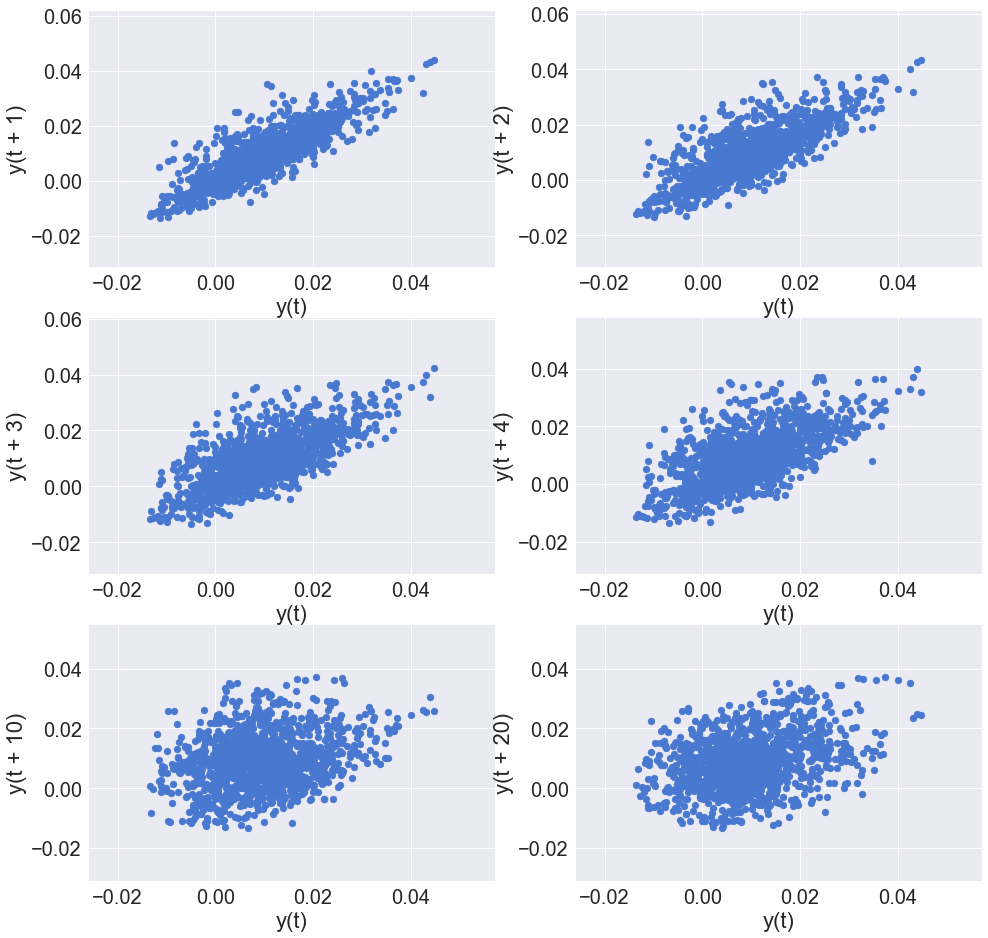

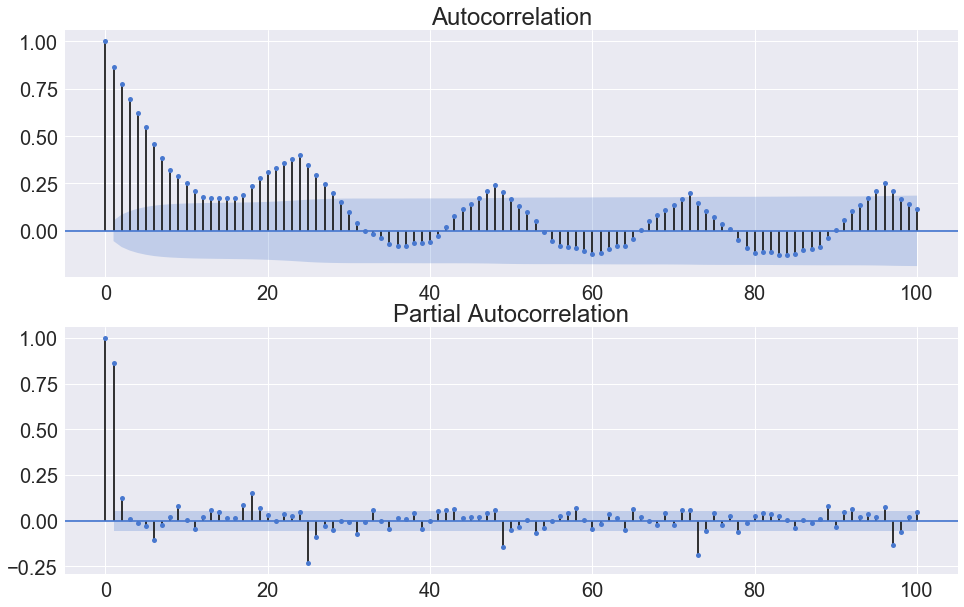

In [135]:
# Error Analysis(Plot)
Resid_tr_reg1['RowNum'] = Resid_tr_reg1.reset_index().index

# Stationarity(Trend) Analysis
sns.set(palette="muted", color_codes=True, font_scale=2)
sns.lmplot(x='RowNum', y='Error', data=Resid_tr_reg1.iloc[1:],
           fit_reg='True', size=7, aspect=2, ci=99, sharey=True)

# Normal Distribution Analysis
figure, axes = plt.subplots(figsize=(16,8))
sns.distplot(Resid_tr_reg1['Error'].iloc[1:], norm_hist='True', fit=stats.norm)

# Lag Analysis
length = int(len(Resid_tr_reg1['Error'])/10)
figure, axes = plt.subplots(3, 2, figsize=(16,16))
pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:length], lag=1, ax=axes[0,0])
pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:length], lag=2, ax=axes[0,1])
pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:length], lag=3, ax=axes[1,0])
pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:length], lag=4, ax=axes[1,1])
pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:length], lag=10, ax=axes[2,0])
pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:length], lag=20, ax=axes[2,1])

# Autocorrelation Analysis
figure, axes = plt.subplots(2,1,figsize=(16,10))
figure = sm.graphics.tsa.plot_acf(Resid_tr_reg1['Error'].iloc[1:length], lags=100, use_vlines=True, ax=axes[0])
figure = sm.graphics.tsa.plot_pacf(Resid_tr_reg1['Error'].iloc[1:length], lags=100, use_vlines=True, ax=axes[1])

# Error Analysis(Statistics)
# Checking Stationarity
# Null Hypothesis: The Time-series is non-stationalry
Stationarity = pd.Series(sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])[0:4], index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
for key, value in sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])[4].items():
    Stationarity['Critical Value(%s)'%key] = value
Stationarity['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])[5]
Stationarity = pd.DataFrame(Stationarity, columns=['Stationarity'])

# Checking of Normality
# Null Hypothesis: The residuals are normally distributed
Normality = pd.DataFrame([stats.shapiro(Resid_tr_reg1['Error'])], index=['Normality'], columns=['Test Statistics', 'p-value']).T

# Checking for Autocorrelation
# Null Hypothesis: Autocorrelation is absent
Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr_reg1['Error'], lags=[1,5,10,50])[0], columns=['Test Statistics']),
                             pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr_reg1['Error'], lags=[1,5,10,50])[1], columns=['p-value'])], axis=1).T
Autocorrelation.columns = ['Autocorr(lag1)', 'Autocorr(lag5)', 'Autocorr(lag10)', 'Autocorr(lag50)']

# Checking Heteroscedasticity
# Null Hypothesis: Error terms are homoscedastic
Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Resid_tr_reg1['Error'], X_train.values, alternative='two-sided')],
                                  index=['Heteroscedasticity'], columns=['Test Statistics', 'p-value', 'Alternative']).T
Error_Analysis = pd.concat([Stationarity, Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
Error_Analysis = Error_Analysis.loc[['Test Statistics', 'p-value', 'Alternative', 'Used Lag', 'Used Observations',
                                     'Critical Value(1%)', 'Critical Value(5%)', 'Critical Value(10%)',
                                     'Maximum Information Criteria'],:]
Error_Analysis

In [3]:
### Functionalize
### Error analysis
def error_analysis(Y_Data, Target_name, X_Data, graph_on=False):
    for x in Target_name:
        Target_name = x
    X_Data = X_Data.loc[Y_Data.index]

    if graph_on == True:
        ##### Error Analysis(Plot)
        Y_Data['RowNum'] = Y_Data.reset_index().index

        # Stationarity(Trend) Analysis
        sns.set(palette="muted", color_codes=True, font_scale=2)
        sns.lmplot(x='RowNum', y=Target_name, data=Y_Data, fit_reg='True', size=7, aspect=2, ci=99, sharey=True)
        del Y_Data['RowNum']

        # Normal Distribution Analysis
        figure, axes = plt.subplots(figsize=(16,8))
        sns.distplot(Y_Data[Target_name], norm_hist='True', fit=stats.norm)

        # Lag Analysis
        length = int(len(Y_Data[Target_name])/10)
        figure, axes = plt.subplots(3, 2, figsize=(16,16))
        pd.plotting.lag_plot(Y_Data[Target_name].iloc[1:length], lag=1, ax=axes[0,0])
        pd.plotting.lag_plot(Y_Data[Target_name].iloc[1:length], lag=2, ax=axes[0,1])
        pd.plotting.lag_plot(Y_Data[Target_name].iloc[1:length], lag=3, ax=axes[1,0])
        pd.plotting.lag_plot(Y_Data[Target_name].iloc[1:length], lag=4, ax=axes[1,1])
        pd.plotting.lag_plot(Y_Data[Target_name].iloc[1:length], lag=10, ax=axes[2,0])
        pd.plotting.lag_plot(Y_Data[Target_name].iloc[1:length], lag=20, ax=axes[2,1])

        # Autocorrelation Analysis
        figure, axes = plt.subplots(2,1,figsize=(16,10))
        sm.graphics.tsa.plot_acf(Y_Data[Target_name].iloc[1:length], lags=100, use_vlines=True, ax=axes[0])
        sm.graphics.tsa.plot_pacf(Y_Data[Target_name].iloc[1:length], lags=100, use_vlines=True, ax=axes[1])      

    ##### Error Analysis(Statistics)
    # Checking Stationarity
    # Null Hypothesis: The Time-series is non-stationalry
    Stationarity = pd.Series(sm.tsa.stattools.adfuller(Y_Data[Target_name])[0:4],
                             index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
    for key, value in sm.tsa.stattools.adfuller(Y_Data[Target_name])[4].items():
        Stationarity['Critical Value(%s)'%key] = value
        Stationarity['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data[Target_name])[5]
        Stationarity = pd.DataFrame(Stationarity, columns=['Stationarity'])

    # Checking of Normality
    # Null Hypothesis: The residuals are normally distributed
    Normality = pd.DataFrame([stats.shapiro(Y_Data[Target_name])],
                             index=['Normality'], columns=['Test Statistics', 'p-value']).T

    # Checking for Autocorrelation
    # Null Hypothesis: Autocorrelation is absent
    Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Y_Data[Target_name], lags=[1,5,10,50])[0], columns=['Test Statistics']),
                                 pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Y_Data[Target_name], lags=[1,5,10,50])[1], columns=['p-value'])], axis=1).T
    Autocorrelation.columns = ['Autocorr(lag1)', 'Autocorr(lag5)', 'Autocorr(lag10)', 'Autocorr(lag50)']

    # Checking Heteroscedasticity
    # Null Hypothesis: Error terms are homoscedastic
    Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Y_Data[Target_name], X_Data.values, alternative='two-sided')],
                                      index=['Heteroscedasticity'], columns=['Test Statistics', 'p-value', 'Alternative']).T
    Score = pd.concat([Stationarity, Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
    Score = Score.loc[['Test Statistics', 'p-value', 'Alternative', 'Used Lag', 'Used Observations',
                       'Critical Value(1%)', 'Critical Value(5%)', 'Critical Value(10%)', 'Maximum Information Criteria'],:]
    return Score
# error_analysis(Resid_tr_reg1[1:], ['Error'], X_train, graph_on=True)

# [Comparison]

Train_size: (13003, 29) Test_size: (4376, 29)
X_train: (13003, 24) Y_train: (13003, 1)
X_test: (4376, 24) Y_test: (4376, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.260e+08
Date:                Wed, 27 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:59:54   Log-Likelihood:                 1826.1
No. Observations:               13003   AIC:                            -3604.
Df Residuals:                   12979   BIC:                            -3425.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
season         -6.598e-05      0.004     -0.016      0.988      -0.008       0.008
holiday            0.0083      0.014      0.611      0.541      -0.018       0.035
workingday         0.0080      0.007      1.192      0.233      -0.005       0.021
weather            0.0042      0.003      1.216      0.224      -0.003       0.011
temp               0.0023      0.002      1.095      0.274      -0.002       0.006
atemp             -0.0025      0.002     -1.358      0.175      -0.006       0.001
humidity          -0.0001      0.000     -0.901      0.368      -0.000       0.000
windspeed          0.0003      0.000      1.061      0.289      -0.000       0.001
count_trend     9.029e-05   8.67e-05      1.041      0.298   -7.98e-05       0.000
count_seasonal  1.964e-05   2.58e-05      0.760      0.447    -3.1e-05    7.03e-05
count_Day       4.351e-05   8.43e-05      0.516      0.606      -0.000       0.000
count_Week     -4.718e-05   9.68e-05     -0.488      0.626      -0.000       0.000
count_diff         1.0000   2.94e-05    3.4e+04      0.000       1.000       1.000
Year           -1.594e-05   8.08e-06     -1.973      0.048   -3.18e-05   -1.07e-07
Quater_ver2        0.0006      0.002      0.253      0.800      -0.004       0.005
Month              0.0028      0.002      1.114      0.265      -0.002       0.008
Day                0.0004      0.000      1.782      0.075   -3.81e-05       0.001
Hour               0.0006      0.000      1.531      0.126      -0.000       0.001
DayofWeek          0.0003      0.002      0.221      0.825      -0.003       0.003
count_lag1         1.0000   2.74e-05   3.64e+04      0.000       1.000       1.000
count_lag2     -1.974e-05   2.63e-05     -0.751      0.453   -7.13e-05    3.18e-05
Quater_Dummy_2    -0.0016      0.009     -0.177      0.859      -0.020       0.016
Quater_Dummy_3    -0.0057      0.017     -0.327      0.743      -0.040       0.028
Quater_Dummy_4    -0.0161      0.026     -0.610      0.542      -0.068       0.036
==============================================================================
Omnibus:                    53827.785   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      90888696981.562
Skew:                        -113.702   Prob(JB):                         0.00
Kurtosis:                   12953.061   Cond. No.                     3.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MAD  MSE  MAPE
Train 0.01 0.04  0.06
Test  0.01 0.00  0.02

Stationarity  Normality  Autocorr(lag1)  \
Test Statistics                      -9.78       0.01            0.00   
p-value                               0.00       0.00            0.98   
Alternative                            nan        nan             nan   
Used Lag                             41.00        nan             nan   
Used Observations                12,961.00        nan             nan   
Critical Value(1%)                   -3.43        nan             nan   
Critical Value(5%)                     nan        nan             nan   
Critical Value(10%)                    nan        nan             nan   
Maximum Information Criteria   -105,471.54        nan             nan   

                              Autocorr(lag5)  Autocorr(lag10)  \
Test Statistics                         0.01             0.03   
p-value                                 1.00             1.00   
Alternative                              nan              nan   
Used Lag                                 nan              nan   
Used Observations                        nan              nan   
Critical Value(1%)                       nan              nan   
Critical Value(5%)                       nan              nan   
Critical Value(10%)                      nan              nan   
Maximum Information Criteria             nan              nan   

                              Autocorr(lag50) Heteroscedasticity  
Test Statistics                          0.11               0.00  
p-value                                  1.00               0.00  
Alternative                               nan          two-sided  
Used Lag                                  nan                NaN  
Used Observations                         nan                NaN  
Critical Value(1%)                        nan                NaN  
Critical Value(5%)                        nan                NaN  
Critical Value(10%)                       nan                NaN  
Maximum Information Criteria              nan                NaN

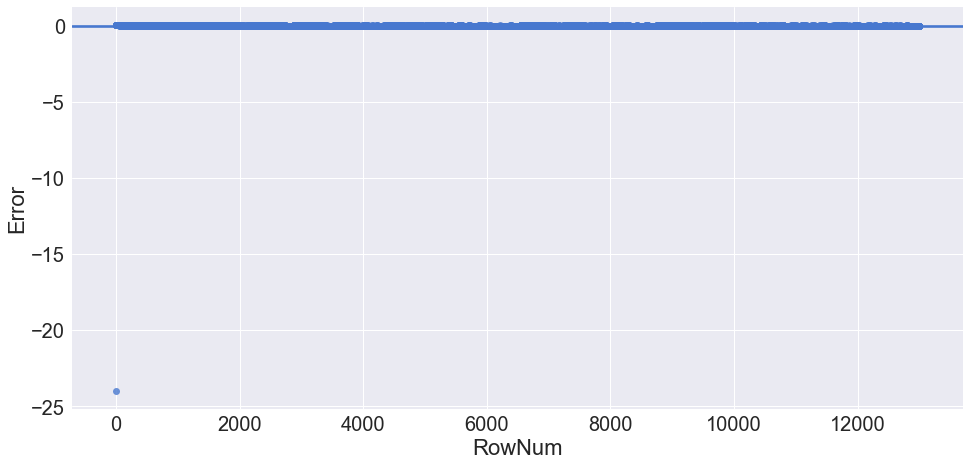

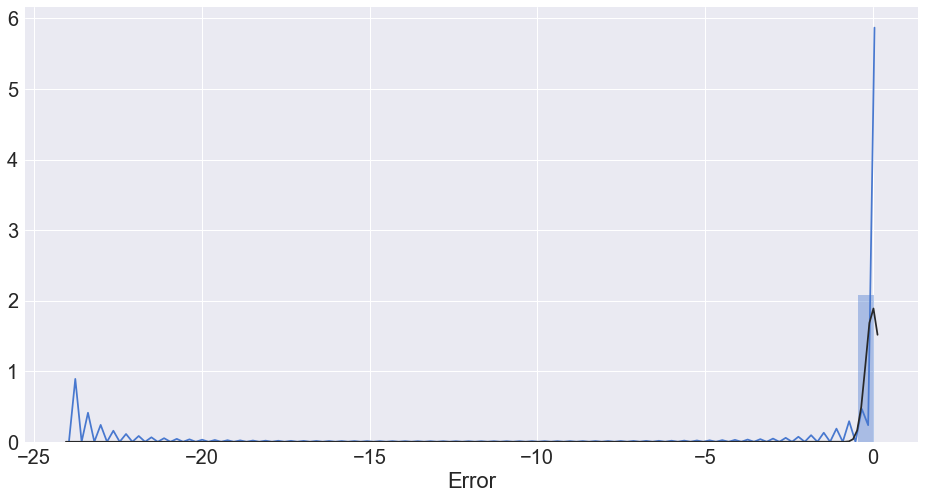

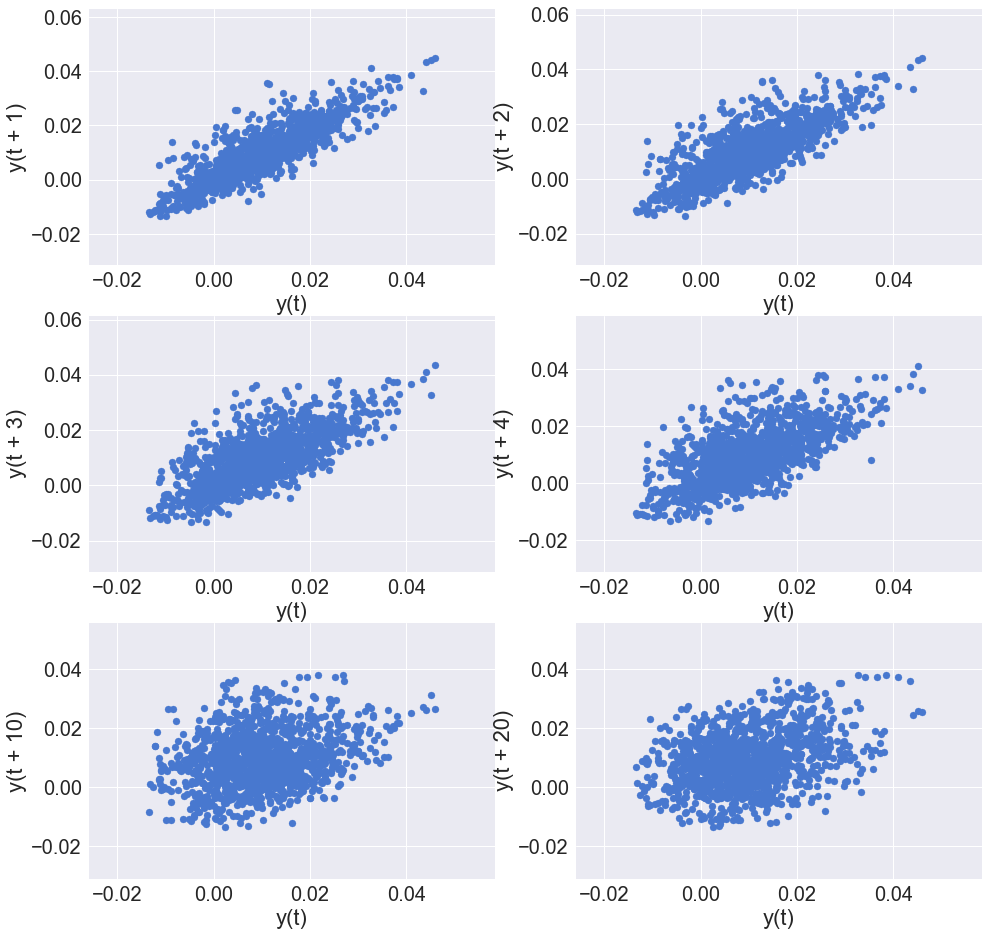

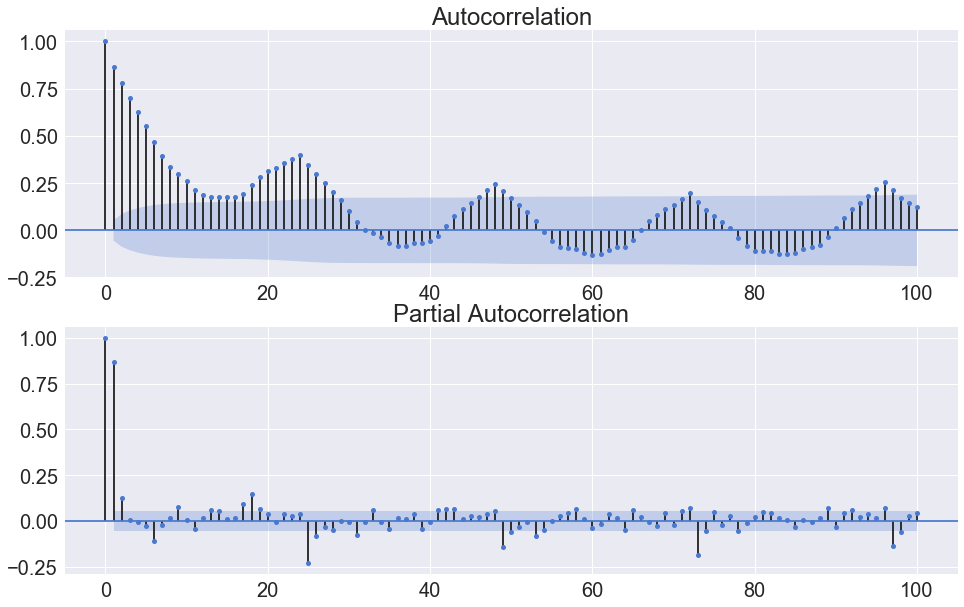

In [148]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = '../Data/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train, X_test, Y_train, Y_test = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')

# Applying Base Model
model_fit_reg1 = sm.OLS(Y_train, X_train).fit()
display(model_fit_reg1.summary())
model_pred_tr_reg1 = model_fit_reg1.predict(X_train).values
model_pred_te_reg1 = model_fit_reg1.predict(X_test).values

# Evaluation
Score1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, model_pred_tr_reg1,
                                                       Y_test, model_pred_te_reg1, graph_on=True)
display(Score1)

# Error Analysis
error_analysis(Resid_tr_reg1, ['Error'], X_train, graph_on=True)

Train_size: (13003, 12) Test_size: (4376, 12)
X_train: (13003, 8) Y_train: (13003, 1)
X_test: (4376, 8) Y_test: (4376, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     2848.
Date:                Wed, 27 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:39:08   Log-Likelihood:                -82567.
No. Observations:               13003   AIC:                         1.651e+05
Df Residuals:                   12995   BIC:                         1.652e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season         3.3249      1.282      2.594      0.009       0.813       5.837
holiday       -6.2382      7.434     -0.839      0.401     -20.810       8.333
workingday    10.1852      2.640      3.859      0.000       5.011      15.359
weather        7.2507      2.087      3.474      0.001       3.159      11.342
temp          -8.7942      1.230     -7.148      0.000     -11.206      -6.383
atemp         16.9175      1.102     15.356      0.000      14.758      19.077
humidity      -1.7418      0.064    -27.385      0.000      -1.866      -1.617
windspeed      2.2517      0.136     16.582      0.000       1.986       2.518
==============================================================================
Omnibus:                     2161.543   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3947.217
Skew:                           1.054   Prob(JB):                         0.00
Kurtosis:                       4.686   Cond. No.                         449.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MAD       MSE   MAPE
Train 102.61 19,182.10 460.74
Test  154.15 44,781.41 319.74

Stationarity  Normality  Autocorr(lag1)  \
Test Statistics                      -9.18       0.94        8,130.92   
p-value                               0.00       0.00            0.00   
Alternative                            nan        nan             nan   
Used Lag                             40.00        nan             nan   
Used Observations                12,962.00        nan             nan   
Critical Value(1%)                   -3.43        nan             nan   
Critical Value(5%)                     nan        nan             nan   
Critical Value(10%)                    nan        nan             nan   
Maximum Information Criteria    141,894.32        nan             nan   

                              Autocorr(lag5)  Autocorr(lag10)  \
Test Statistics                    12,444.96        13,044.34   
p-value                                 0.00             0.00   
Alternative                              nan              nan   
Used Lag                                 nan              nan   
Used Observations                        nan              nan   
Critical Value(1%)                       nan              nan   
Critical Value(5%)                       nan              nan   
Critical Value(10%)                      nan              nan   
Maximum Information Criteria             nan              nan   

                              Autocorr(lag50) Heteroscedasticity  
Test Statistics                     47,887.12               1.73  
p-value                                  0.00               0.00  
Alternative                               nan          two-sided  
Used Lag                                  nan                NaN  
Used Observations                         nan                NaN  
Critical Value(1%)                        nan                NaN  
Critical Value(5%)                        nan                NaN  
Critical Value(10%)                       nan                NaN  
Maximum Information Criteria              nan                NaN

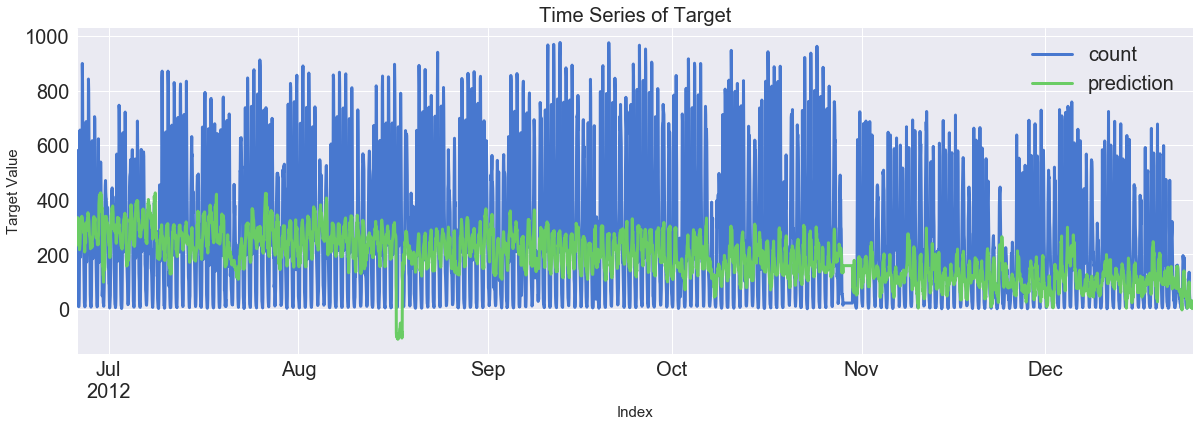

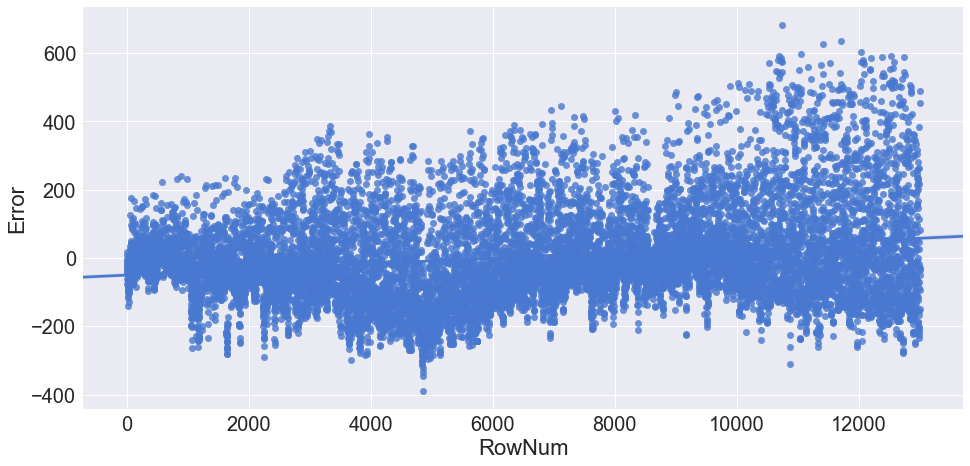

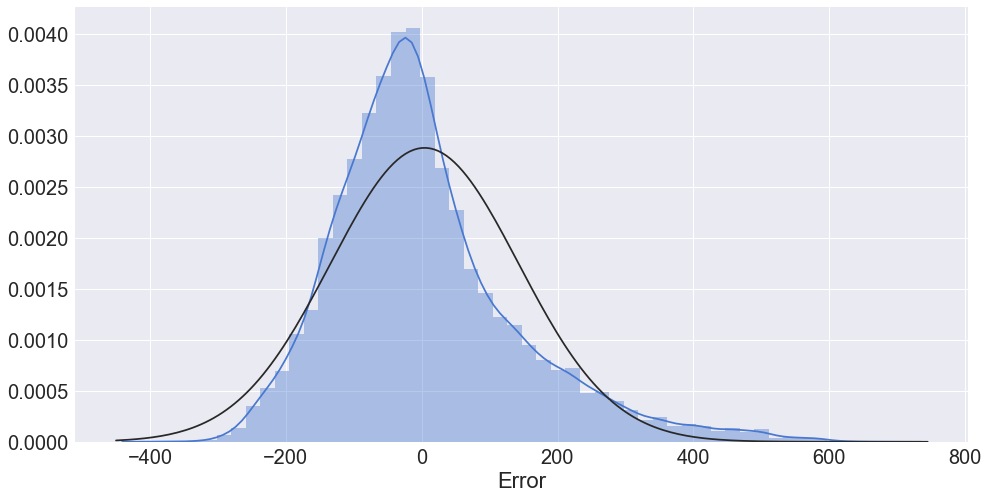

In [147]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = '../Data/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_copy = non_feature_engineering(raw_all)

# Data Split
# Confirm of input and output
Y_colname_cp = ['count']
X_remove_cp = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname_cp = [x for x in raw_copy.columns if x not in Y_colname_cp+X_remove_cp]
X_train_cp, X_test_cp, Y_train_cp, Y_test_cp = datasplit_ts(raw_copy, Y_colname_cp, X_colname_cp, '2012-07-01')

# Applying Base Model
model_fit_reg1_cp = sm.OLS(Y_train_cp, X_train_cp).fit()
display(model_fit_reg1_cp.summary())
model_pred_tr_reg1_cp = model_fit_reg1_cp.predict(X_train_cp).values
model_pred_te_reg1_cp = model_fit_reg1_cp.predict(X_test_cp).values

# Evaluation
Score1_cp, Resid_tr_reg1_cp, Resid_te_reg1_cp = evaluation_trte(Y_train_cp, model_pred_tr_reg1_cp, 
                                                                Y_test_cp, model_pred_te_reg1_cp, graph_on=True)
display(Score1_cp)

# Error Analysis
error_analysis(Resid_tr_reg1_cp, ['Error'], X_train_cp, graph_on=True)

# [Insufficient for me]  
**1) 단계이해**  
>**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  
**5. Data Split: Train/Validate/Test Sets**  
**6. Applying Base Model**  
**7. Evaluation**  
**8. Error Analysis** 

**2) 데이터 핸들링**  
**3) 결과 해석**  